# Problem #1
Download the Weather data set, a simple data set describing whether or not to play tennis based on the weather conditions.

 Represent the following table using a data structure of your choice
• Given that data structure
o Calculate the mean temperature and mean humidity
o Print outlook and play for those days where the temperature is greater than the
average temperature
o Print outlook and play for those days where the humidity is greater than the
average humidity
o Convert the temperature to Celsius and add a new column therefore in the table.
Use the following conversion equation C=(F−32)∗5/9
1. How often do you play tennis independent of the other attributes?
2. How often do you play tennis when it is "sunny"?
3. Compare the average, minimum and maximum temperature when you play tennis?
4. Compare the average, minimum and maximum humidity when you play tennis?
5. Plot the an scatter plot (x,y diagramm) of humidity (x) and temperature (y) when you
play tennis compared to when you do not play tennis.

In [445]:
# read the weather into a dataframe
import pandas as pd
w_df = pd.read_csv("/Users/preetijavaji/Downloads/weather.csv.txt",sep ="\t",index_col=None)


In [128]:
w_df

,Day,outlook,temperature,humidity,windy,play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes
5,6,rainy,65,70,True,no
6,7,overcast,64,65,True,yes
7,8,sunny,72,95,False,no
8,9,sunny,69,70,False,yes
9,10,rainy,75,80,False,yes


In [143]:
#How often do you play tennis independent of the other attributes?

l = w_df['play'].value_counts()
print "No of times Tennis played  =",l['yes']


No of times Tennis played  = 9


In [59]:
#2.How often do you play tennis when it is "sunny"?
per_play = 0
for outlook,play in zip(w_df['outlook'],w_df['play']):
    if outlook == 'sunny' and play == 'yes' :
        per_play = per_play +1
#per_play = per_play * 100.0 /len(w_df['outlook'])

#l = w_df.groupby(['play','outlook'])
print "No of times Tennis played when it is sunny =",per_play


No of times Tennis played when it is sunny = 2


In [40]:
#3.Compare the average, minimum and maximum temperature when you play tennis?
#4.Compare the average, minimum and maximum humidity when you play tennis?
l_humidity =[]
l_temp = []

for temp,play,humidity in zip(w_df['temperature'],w_df['play'],w_df['humidity']):
    if play == 'yes':
       l_temp.append(temp)
       l_humidity.append(humidity)
print "Average temp when tennis played =",sum(l_temp)/(len(l_temp) * 1.0)
print "Max temp when tennis played =", max(l_temp)
print "Min temp when tennis played =" ,min(l_temp)
print "Average Humidity when tennis played =",sum(l_humidity)/(len(l_humidity) * 1.0)
print "Max Humidity when tennis played =", max(l_humidity)
print "Min Humidity when tennis played =" ,min(l_humidity)

Average temp when tennis played = 73.0
Max temp when tennis played = 83
Min temp when tennis played = 64
Average Humidity when tennis played = 79.1111111111
Max Humidity when tennis played = 96
Min Humidity when tennis played = 65


In [129]:
# Mean Temperature
mean_temp = w_df['temperature'].mean()
print "mean_temperature =",mean_temp

mean_temperature = 73.5714285714


In [130]:
# Mean Humidity
mean_humidity = w_df['humidity'].mean()
print "mean_humidity =",mean_humidity

mean_humidity = 81.6428571429


In [136]:
#Print outlook and play for those days where the temperature is greater than the
#average temperature
w_df[w_df['temperature'] > mean_temp][['temperature','outlook','play']]

,temperature,outlook,play
0,85,sunny,no
1,80,sunny,no
2,83,overcast,yes
9,75,rainy,yes
10,75,sunny,yes
12,81,overcast,yes


In [139]:
#Print outlook and play for those days where the humidity is greater than the
#average humidity
w_df[w_df['humidity'] > mean_humidity][['humidity','outlook','play']]

,humidity,outlook,play
0,85,sunny,no
1,90,sunny,no
2,86,overcast,yes
3,96,rainy,yes
7,95,sunny,no
11,90,overcast,yes
13,91,rainy,no


In [141]:
# Convert C = (F-32)* 5/9

w_df['Celcius'] = (w_df['temperature'] -32) *(5.0/9)

In [142]:
w_df

,Day,outlook,temperature,humidity,windy,play,Celcius
0,1,sunny,85,85,False,no,29.444444
1,2,sunny,80,90,True,no,26.666667
2,3,overcast,83,86,False,yes,28.333333
3,4,rainy,70,96,False,yes,21.111111
4,5,rainy,68,80,False,yes,20.000000
5,6,rainy,65,70,True,no,18.333333
6,7,overcast,64,65,True,yes,17.777778
7,8,sunny,72,95,False,no,22.222222
8,9,sunny,69,70,False,yes,20.555556
9,10,rainy,75,80,False,yes,23.888889


In [446]:
#5 .Plot the an scatter plot (x,y diagramm) of humidity (x) and temperature (y) 
#when you play tennis compared to when you do not play tennis.
w_df_yes = w_df.loc[w_df['play'] == 'yes']

In [447]:
w_df_no = w_df.loc[w_df['play'] == 'no']

Populating the interactive namespace from numpy and matplotlib


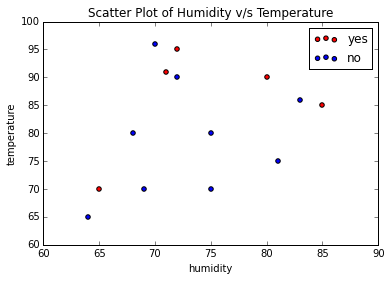

In [448]:
%pylab inline
import matplotlib.pyplot as plt
plt.scatter(w_df_no['temperature'],w_df_no['humidity'],c='red')
plt.scatter(w_df_yes['temperature'],w_df_yes['humidity'],c='blue')
plt.title('Scatter Plot of Humidity v/s Temperature')
plt.ylabel('temperature')
plt.xlabel('humidity')
plt.legend(['yes','no'])
plt.show()

# 2. Problem #2
Included with the assignment are several files (stxxxxts). These files track the historical population of US states by year for 1900-1990. Write a script to process these data and load them into a data structure you can work with. What problems did you have to deal with when working with these files?
Plot the populations of Alaska and California over time. Plot the population of New England and the Southwest over time. Don’t forget to label your axes.
What state showed the greatest change in population? Note that there is more than one way to quantify this - provide at least two (meaningful) ways in your iPython Notebook.

In [178]:
#Step 1 :
import sys
import os
%cd "/Users/preetijavaji/Documents/DSE/pjavaji/DSE-220/Assignments/Lab 1/org"
!for f in *;do cat "$f"| python -c 'import sys; print "".join(l for l in sys.stdin.readlines() if l.strip()),' > "$f.new";done


/Users/preetijavaji/Documents/DSE/pjavaji/DSE-220/Assignments/Lab 1/org


In [2]:
# Step 2:
%cd "/Users/preetijavaji/Documents/DSE/pjavaji/DSE-220/Assignments/Lab 1/mod"
# Doing a simple grep shows st0009 , st1019 ,st2029 ,st3039,st4049,st5060,st6070 have 
# the same header.
!grep -n "U.S." *.new

/Users/preetijavaji/Documents/DSE/pjavaji/DSE-220/Assignments/Lab 1/mod
st.new:4:        U.S. Bureau of the Census




st4049ts.txt.new:11:U.S.               131954  133121  133920  134245  132885 132481    140054  143446  146093  148665
st5060ts.txt.new:13:U.S.            151326 151868  153982  156393 158956  161884   165069 168088  171187  174149 177135  179323

st7080ts.txt.new:4:        U.S. Bureau of the Census



In [180]:
# Step 3
#replace "North Central" to North_Central
!sed -i -- 's/North Central/North_Central/' *.new
!sed -i -- 's/,//g' *.new

In [146]:
%cd "/Users/preetijavaji/Documents/DSE/pjavaji/DSE-220/Assignments/Lab 1/mod"
import pandas as pd
cols = ['state',1900,1901,1902,1903,1904,1905,1906,1907,1908,1909]
st0009_df = pd.read_csv("st0009ts.txt.new",skiprows=12,names =cols,sep=" ",skipinitialspace=True)
cols = ['state',1910,1911,1912,1913,1914,1915,1916,1917,1918,1919]
st1019_df = pd.read_csv("st1019ts.txt.new",skiprows=12,names =cols,sep=" ",skipinitialspace=True)
cols = ['state',1920,1921,1922,1923,1924,1925,1926,1927,1928,1929]
st2029_df = pd.read_csv("st2029ts.txt.new",skiprows=12,names =cols,sep=" ",skipinitialspace=True)
cols = ['state',1930,1931,1932,1933,1934,1935,1936,1937,1938,1939]
st3039_df = pd.read_csv("st3039ts.txt.new",skiprows=12,names =cols,sep=" ",skipinitialspace=True)

/Users/preetijavaji/Documents/DSE/pjavaji/DSE-220/Assignments/Lab 1/mod


In [153]:
cols = ['state',1940,1941,1942,1943,1944,1945,1946,1947,1948,1949]
st4049_df = pd.read_csv("st4049ts.txt.new",skiprows=10,names =cols,sep=" ",skipinitialspace=True)
cols = ['state','1950_x',1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,'1960_x']
st5060_df = pd.read_csv("st5060ts.txt.new",skiprows=12,names =cols,sep=" ",skipinitialspace=True)
del st5060_df['1950_x']
del st5060_df['1960_x']

In [149]:
cols = ['state','1960_x',1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,'1970_x']
st6070_df = pd.read_csv("st6070ts.txt.new",skiprows=12,names =cols,sep=" ",skipinitialspace=True)
del st6070_df['1960_x']
del st6070_df['1970_x']

In [8]:
# remove last 4 lines of this file
!sed '$d' "st7080ts.txt.new" | sed '$d' | sed '$d' > st.new

In [150]:


cols = ['state',1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,'1980_x']
st7080_df = pd.read_csv("st.new",skiprows=10,names =cols,sep=" ",skipinitialspace=True)
del st7080_df['1980_x']

In [151]:
import pandas as pd
cols = ['state',1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990]
st8090_df = pd.read_csv("st8090ts.txt.new",skiprows=7,names =cols,sep=" ",skipinitialspace=True)

2. What problems did you have to deal with when working with these files? 
All files were slightly different in format. The headers were different
St7080 esp had a problem with the whole country population. I just dropped that line since we are not interested in the overall population

3. Plot the populations of Alaska and California over time. Plot the population of New England and the Southwest over time. Don’t forget to label your axes. What state showed the greatest change in population? Note that there is more than one way to quantify this - provide at least two (meaningful) ways in your iPython Notebook.


1. What problems did you have to deal with when working with these files? 
Preprocessing done:
1) Remove all blank lines
2) Convert "North Central" into "North_Cetral"
3) Find out how many lines to skip when reading the csv.
4) One file has extra lines at the bottom. remove them
5) Two files do not have population in thousands. Convert them to thousands.
7) There are many years that are repeated. Remove one of them.
8) There are commas in the numbers which makes python treat the values as strings.Remove them.
9) In some files the country name is "US" in others , it is "U.S" . Make then same.

In [154]:
st4049_df.shape

(54, 11)

In [155]:
# Merge all dataframes so we have a new combined dataframe
# first some sanity checks
# Check the number of rows in each dataframe
print st0009_df.shape
print st1019_df.shape
print st2029_df.shape
print st3039_df.shape
print st4049_df.shape
print st5060_df.shape
print st6070_df.shape
print st7080_df.shape
print st8090_df.shape

(54, 11)
(54, 11)
(54, 11)
(54, 11)
(54, 11)
(58, 11)
(56, 11)
(52, 11)
(52, 12)


In [156]:
cols = [1970,1971,1972,1973,1974,1975,1976,1977,1978,1979]
for c in st7080_df:
    if c in cols:
        st7080_df[c] = st7080_df[c]/1000.0

In [157]:
cols = [1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990]
for c in st8090_df:
    if c in cols:
        st8090_df[c] = st8090_df[c]/1000.0

In [158]:
st8090_df.head()

,state,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,US,226545.805,229465.714,231664.458,233791.994,235824.902,237923.795,240132.887,242288.918,244498.982,246819.230,248709.873
1,AL,3893.888,3918.531,3925.266,3934.102,3951.820,3972.523,3991.569,4015.264,4023.844,4030.222,4040.587
2,AK,401.851,418.491,449.606,488.417,513.702,532.495,544.268,539.309,541.983,547.159,550.043
3,AZ,2718.215,2810.107,2889.861,2968.925,3067.135,3183.538,3308.262,3437.103,3535.183,3622.185,3665.228
4,AR,2286.435,2293.201,2294.257,2305.761,2319.768,2327.046,2331.984,2342.355,2342.656,2346.358,2350.725


In [159]:
fin_df = pd.merge(st8090_df,st7080_df,on='state',how='outer')

,state,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909
5,CA,23667902,24285933,24820009,25360026,25844393,26441109,27102237,27777158,28464249,...,1490,1550,1623,1702,1792,1893,1976,2054,2161,2282


In [160]:
#fin_df = pd.merge(st0009_df, st1019_df, right_index='state',left_index='state' ,how='outer')
fin_df = pd.merge(fin_df, st6070_df, on='state', how='outer')
fin_df = pd.merge(fin_df, st5060_df,on='state', how='outer')
fin_df = pd.merge(fin_df, st4049_df, on='state', how='outer')
fin_df = pd.merge(fin_df, st3039_df, on='state', how='outer')
fin_df = pd.merge(fin_df, st2029_df, on='state', how='outer')
fin_df = pd.merge(fin_df, st1019_df, on='state', how='outer')
fin_df = pd.merge(fin_df, st0009_df, on='state', how='outer')

3. Plot the populations of Alaska and California over time. Plot the population of New England and the Southwest over time. Don’t forget to label your axes. What state showed the greatest change in population? Note that there is more than one way to quantify this - provide at least two (meaningful) ways in your iPython Notebook.

In [173]:
fin_df = fin_df.reindex_axis(sorted(fin_df.columns), axis=1)

In [174]:
fin_df.columns

Index([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, u'state'], dtype='object')

In [175]:
df_CA = fin_df[fin_df['state']=='CA']
df_AK = fin_df[fin_df['state']=='AK']
#df_AK.drop['state',axis==0,inplace==True]
del df_AK['state']
del df_CA['state']



In [164]:
tmp_CA.shape

(91, 1)

In [457]:
x_labels = df_AK.columns
x = [ i for i in range(91) ]

In [452]:
tmp_AK = df_AK.transpose()
tmp_CA = df_CA.transpose()

In [453]:
tmp_CA.head()

,5
1900,1490
1901,1550
1902,1623
1903,1702
1904,1792


In [454]:
len(x)

51

In [455]:
df_CA

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
5,1490,1550,1623,1702,1792,1893,1976,2054,2161,2282,...,24285.933,24820.009,25360.026,25844.393,26441.109,27102.237,27777.158,28464.249,29218.164,29760.021


Populating the interactive namespace from numpy and matplotlib


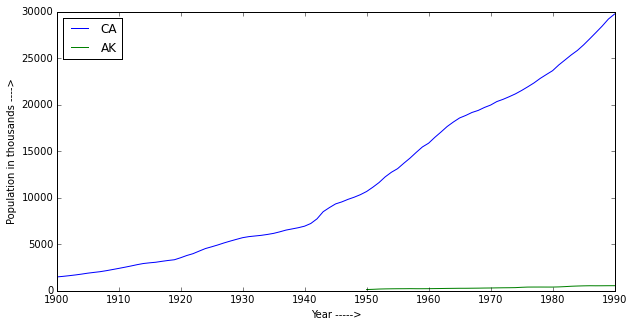

In [459]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#df_AK.plot(x=)
#plt.ylabel('some numbers')
#plt.plot(X1,tmp.ix[:,8])
#plt.show()
fig, ax = plt.subplots(figsize = (10,5) , dpi = 80)


ax.set_xticklabels([1900,1910,1920,1930,1940,1950,1960,1970,1980,1990]) # uses Index 

ax.set_ylabel('Population in thousands ---->')
ax.set_xlabel('Year ----->')
ax.plot(x,tmp_CA[5])
ax.plot(x,tmp_AK[2])
legend(['CA','AK'],loc="upper left")
#xlabels(x_labels)


The above graph shows us that there is no data for Alaska till 1950 since Alaska was not created till 1950.


In [189]:
# Population of new-england V/s SouthWest

SW = ['AZ','CA','CO','NV','NM','OK','TX','UT']
NE = ['CT','ME','MA','NH','RI','VT']

SW_DF = fin_df[fin_df['state'].isin(SW)]
NE_DF = fin_df[fin_df['state'].isin(NE)]

In [192]:
# append totals
sum_row = {col:SW_DF[col].sum() for col in SW_DF}
sum_df = pd.DataFrame(sum_row, index=["Total"])
SW_DF = SW_DF.append(sum_df)

In [193]:
SW_DF

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1982,1983,1984,1985,1986,1987,1988,1989,1990,state
3,124,131,138,144,151,158,167,176,186,196,...,2889.861,2968.925,3067.135,3183.538,3308.262,3437.103,3535.183,3622.185,3665.228,AZ
5,1490,1550,1623,1702,1792,1893,1976,2054,2161,2282,...,24820.009,25360.026,25844.393,26441.109,27102.237,27777.158,28464.249,29218.164,29760.021,CA
6,543,581,621,652,659,680,707,733,757,775,...,3061.564,3133.630,3169.992,3208.723,3237.450,3260.480,3262.281,3275.818,3294.394,CO
29,43,45,49,52,56,59,64,68,73,78,...,881.537,901.977,924.922,951.030,980.613,1023.376,1075.022,1137.382,1201.833,NV
32,196,206,218,229,242,255,269,283,298,314,...,1363.823,1394.361,1416.717,1438.361,1462.729,1478.520,1490.337,1503.901,1515.069,NM
37,800,916,1027,1118,1200,1277,1349,1414,1498,1585,...,3206.123,3290.402,3285.533,3271.332,3252.735,3210.122,3167.057,3150.307,3145.585,OK
44,3055,3132,3210,3291,3374,3459,3546,3636,3727,3821,...,15331.415,15751.676,16007.086,16272.734,16561.113,16621.791,16667.022,16806.735,16986.510,TX
45,277,284,292,299,308,316,327,339,351,363,...,1558.314,1594.943,1622.342,1642.910,1662.834,1678.119,1689.372,1705.864,1722.850,UT
Total,6528,6845,7178,7487,7782,8097,8405,8703,9051,9414,...,53112.646,54395.940,55338.120,56409.737,57567.973,58486.669,59350.523,60420.356,61291.490,AZCACONVNMOKTXUT


In [194]:
sum_row = {col:NE_DF[col].sum() for col in NE_DF}
sum_df = pd.DataFrame(sum_row, index=["Total"])
NE_DF = NE_DF.append(sum_df)

In [195]:
del NE_DF['state']
del SW_DF['state']

In [198]:
type(NE_DF.ix['Total'])

pandas.core.series.Series

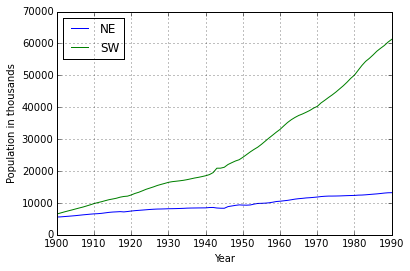

In [450]:
NE_DF.ix['Total'].plot()
SW_DF.ix['Total'].plot()
legend(['NE','SW'],loc="upper left")
xlabel('Year')
ylabel('Population in thousands')

In [216]:
FT.columns = FT.iloc[91]
FT = FT.drop(FT.index[[91]])

In [220]:
FT.describe()

state,US,AL,AK,AZ,AR,CA,CO,CT,DE,DC,...,WI,WY,U.S.,Northeast,Midwest,South,West,REGIONS:,North_Central,STATES:
count,21.000,91,41,91,91,91,91,91,91,91,...,91,91,70,70,10,70,70,0,60,0
unique,21.000,89,38,89,88,91,90,90,87,87,...,91,87,70,69,10,70,70,0,60,0
top,237923.795,2359,224,434,1756,3071,1014,1792,219,791,...,3070,293,119038,35991,55692,42623,4351,NaN,48511,NaN
freq,1.000,2,3,2,2,1,2,2,3,3,...,1,2,1,2,1,1,1,NaN,1,NaN


3. What state showed the greatest change in population? Note that there is more than one way to quantify this - provide at least two (meaningful) ways in your iPython Notebook.

In [380]:
FT.drop('US',inplace=True,axis=1)


In [404]:
FT.drop(['U.S.','Northeast','South','Midwest','West','North_Central'],axis = 1,inplace = True)


In [405]:
# Percentage change by state
Sum = FT.pct_change().describe()

In [406]:
Sum

state,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,TX,UT,VT,VA,WA,WV,WI,WY,REGIONS:,STATES:
count,90.000000,40.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,0,0
mean,0.008894,0.036600,0.039081,0.006594,0.033963,0.020391,0.014448,0.014407,0.009136,0.036415,...,0.019304,0.020666,0.005617,0.013528,0.025394,0.007127,0.009643,0.018037,NaN,NaN
std,0.010555,0.043779,0.040625,0.014848,0.016700,0.018069,0.012534,0.012012,0.029740,0.024158,...,0.010990,0.017653,0.016431,0.012139,0.025261,0.017308,0.010427,0.023776,NaN,NaN
min,-0.034459,-0.030303,-0.118497,-0.067779,0.011368,-0.018470,-0.007874,-0.013699,-0.054054,-0.033520,...,-0.019395,-0.041204,-0.053763,-0.017380,-0.033654,-0.049153,-0.027707,-0.037665,NaN,NaN
25%,0.002664,0.008295,0.025494,0.001926,0.020076,0.007338,0.005542,0.008567,-0.010026,0.023608,...,0.011056,0.010304,0.000000,0.007112,0.010096,-0.006150,0.004707,0.004635,NaN,NaN
50%,0.010065,0.029399,0.033898,0.007282,0.029094,0.020153,0.012033,0.012632,0.005277,0.034438,...,0.021339,0.019776,0.005452,0.013063,0.019153,0.007913,0.009533,0.015811,NaN,NaN
75%,0.013564,0.041737,0.055812,0.015973,0.044084,0.030473,0.022748,0.018050,0.018483,0.049166,...,0.025182,0.029980,0.011932,0.018678,0.029989,0.018797,0.013677,0.033132,NaN,NaN
max,0.049009,0.196203,0.320611,0.034707,0.099677,0.077957,0.077445,0.057065,0.113874,0.139470,...,0.054351,0.097391,0.085714,0.064098,0.116638,0.069087,0.069571,0.075269,NaN,NaN


In [411]:
d = dict(Sum.ix[1,:])

In [412]:
# State with max mean percentile change 
max(d, key=d.get)

'AZ'

In [413]:
# State with min mean percentile change
min(d,key=d.get)

'IA'

In [222]:
fin_df['change'] = fin_df[1990] - fin_df[1900]

In [227]:
# CA showed maximum change
fin_df[fin_df['change'] == fin_df['change'].max()]

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1983,1984,1985,1986,1987,1988,1989,1990,state,change
5,1490,1550,1623,1702,1792,1893,1976,2054,2161,2282,...,25360.026,25844.393,26441.109,27102.237,27777.158,28464.249,29218.164,29760.021,CA,28270.021


In [228]:
# VT showed the least change
fin_df[fin_df['change'] == fin_df['change'].min()]

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1983,1984,1985,1986,1987,1988,1989,1990,state,change
46,344,347,349,350,353,354,355,355,354,356,...,523.302,526.66,530.035,534.066,540.267,549.763,557.707,562.758,VT,218.758


What state showed the greatest change in population? Note that there is more than one way to quantify this - provide at least two (meaningful) ways in your iPython Notebook.

# Part 3:

3. Problem #3
The file POLIO Cases 1928-1969.csv contains the number of cases of polio over time. Write a script to load these data into a data structure of your choice. Please describe any issues you ran into when working with the file. What kinds of data manipulation/cleaning did you have to perform? In addition, what sources of uncertainty (or measurement error) do you think may affect these numbers?
Provide some descriptive statistics and graphical summaries of the history of polio in the United States. Provide a brief description of this history, with citations, and describe how to see these trends in your statistics and graphics.
Were some areas of the country harder hit by polio than others? Demonstrate this graphically - do not forget to account for the total population


In [230]:
%cd "/Users/preetijavaji/Documents/DSE/pjavaji/DSE-220/Assignments/Lab 1"

/Users/preetijavaji/Documents/DSE/pjavaji/DSE-220/Assignments/Lab 1


In [238]:
Polio_DF = pd.read_csv('POLIO_Cases_1928-1969.csv',skiprows=2)

In [239]:
# I did not face any problems loading the data. However there is a lot of missing data which has to be handled.
# Since Pandas ignores NAN values , I decided to replace '-' with Nan.
# lets start with replacing '-' with NAN
import numpy as np
Polio_DF = Polio_DF.replace('-', np.nan)


In [240]:
# Now lets group by year and find the means for each state
Polio_DF.drop('WEEK',inplace=True,axis=1)


Polio_DF = Polio_DF.convert_objects(convert_numeric=True)

In [461]:
S = Polio_DF.groupby('YEAR').sum()
S.head()

,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
YEAR,,,,,,,,,,,,,,,,,,,,,
1928,62,NaN,11,10,272,71,72,8,33,21,...,44,33,38,9,26,15,322,194,50,6
1929,58,NaN,9,4,156,13,21,5,6,34,...,3,93,18,4,19,241,27,58,21,3
1930,67,NaN,32,79,1753,65,74,6,9,12,...,140,61,128,3,3,11,47,41,180,55
1931,54,NaN,11,17,252,9,1139,5,15,17,...,29,48,34,5,89,24,85,81,735,6
1932,35,NaN,7,14,172,8,32,11,34,8,...,15,54,72,3,2,54,75,43,57,6


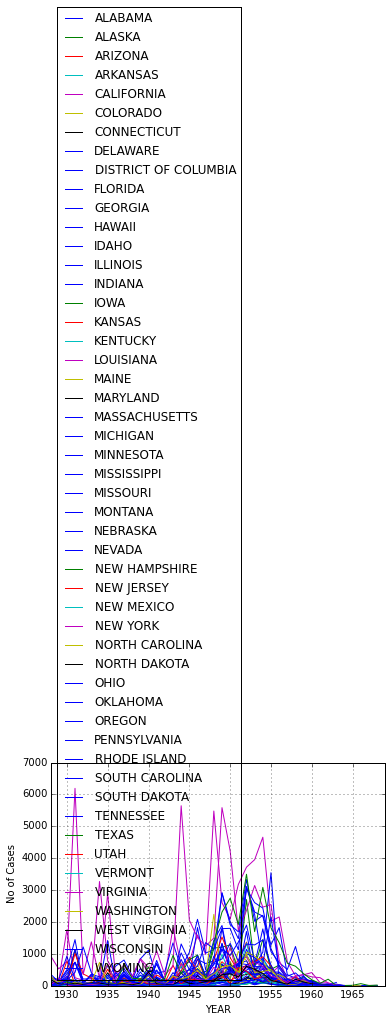

In [462]:
S.plot()
legend(loc="lower left")
xlabel('YEAR')
ylabel('No of Cases')

Populating the interactive namespace from numpy and matplotlib


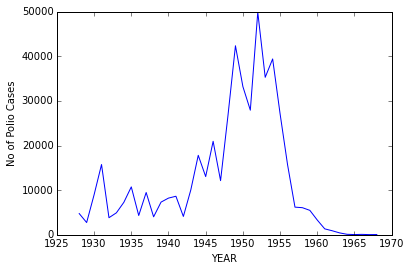

In [242]:
# plot of number of polio cases each year
%pylab inline
import matplotlib.pyplot as plt
x= [i for i in range(1928,1970)]
plt.xlabel('YEAR')
plt.ylabel('No of Polio Cases')
plt.plot(x,S.sum(axis=1))

In [244]:
l= list(S.sum(axis=0))

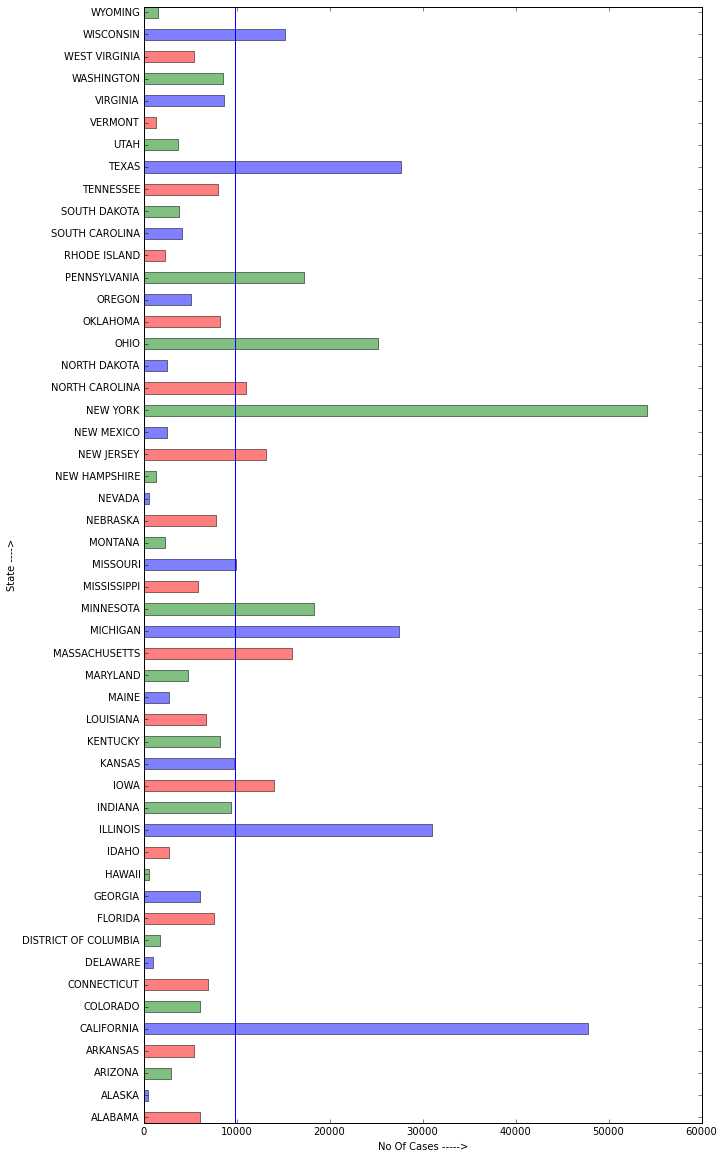

In [245]:
# plot total number of cases by state
x= [i for i in range(1,52)]
fig, ax = plt.subplots(figsize = (10,20) , dpi = 80)
N = 51
index = np.arange(N)
width = 1
ax.set_yticks((index * 2)+ (width/2)+ 0.5)
ax.set_yticklabels(S.columns) # uses Index 
axvline(mean(l),color = 'b')
ax.set_ylabel('State ---->')
ax.set_xlabel('No Of Cases ----->')

bar = ax.barh(index*2,l,1,alpha = 0.5,color = 'rbg')

# Do a classification on regions
Source: http://en.wikipedia.org/wiki/List_of_regions_of_the_United_States
The United States Census Bureau defines four statistical regions, with nine divisions.[1] The Census Bureau regions are "widely used … for data collection and analysis."[2] The Census Bureau definition is pervasive.[3][4][5]

Regional divisions used by the United States Census Bureau:[6]

Region 1: Northeast
Division 1: New England (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)
Division 2: Mid-Atlantic (New Jersey, New York, and Pennsylvania)
Region 2: Midwest (Prior to June 1984, the Midwest Region was designated as the North Central Region.)[6]
Division 3: East North Central (Illinois, Indiana, Michigan, Ohio, and Wisconsin)
Division 4: West North Central (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)
Region 3: South
Division 5: South Atlantic (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, Washington D.C., and West Virginia)
Division 6: East South Central (Alabama, Kentucky, Mississippi, and Tennessee)
Division 7: West South Central (Arkansas, Louisiana, Oklahoma, and Texas)
Region 4: West
Division 8: Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)
Division 9: Pacific (Alaska, California, Hawaii, Oregon, and Washington)


In [262]:
NorthEast =['CONNECTICUT','MAINE','MASSACHUSETTS','NEW HAMPSHIRE','RHODE ISLAND','VERMONT','NEW JERSEY','NEW YORK','PENNSYLVANIA']
MidWest =['ILLINOIS','INDIANA','MICHIGAN','OHIO','WISCONSIN','IOWA','KANSAS','MINNESOTA','MISSOURI','NEBRASKA','NORTH DAKOTA','SOUTH DAKOTA']
South_1 =['DELAWARE','FLORIDA','GEORGIA','MARYLAND','NORTH CAROLINA','SOUTH CAROLINA','VIRGINIA','WEST VIRGINIA']
South_2 =['ALABAMA','KENTUCKY','MISSISSIPPI','TENNESSEE']
South_3 =['ARKANSAS','LOUISIANA','OKLAHOMA','TEXAS']
West_1 =['ARIZONA','COLORADO','IDAHO','MONTANA','NEVADA','NEW MEXICO','UTAH','WYOMING']
West_2 =['ALASKA','CALIFORNIA','HAWAII','OREGON','WASHINGTON'] 

In [263]:
region = {'NorthEast':0,'MidWest':0,'South_1':0,'South_2':0,'South_3':0,'West_1':0,'West_2':0}
for col in S:
    if col in NorthEast:
        region['NorthEast'] = region['NorthEast'] + S[col].sum()
        
    elif col in MidWest:
        region['MidWest'] = region['MidWest'] + S[col].sum()
    elif col in South_1:
        region['South_1'] = region['South_1'] + S[col].sum()
    elif col in South_2:
        region['South_2'] = region['South_2'] + S[col].sum()
    elif col in South_3:
        region['South_3'] = region['South_3'] + S[col].sum()
    elif col in West_1:
        region['West_1'] = region['West_1'] + S[col].sum()
    elif col in West_2:
        region['West_2'] = region['West_2'] + S[col].sum()

In [279]:
print " Region worst hit without considering the population is:"

max(region, key=region.get)

 Region worst hit without considering the population is:


'MidWest'

In [417]:
region

{'MidWest': 174416.0,
 'NorthEast': 115135.0,
 'South_1': 48558.0,
 'South_2': 28113.0,
 'South_3': 48072.0,
 'West_1': 22295.0,
 'West_2': 62474.0}

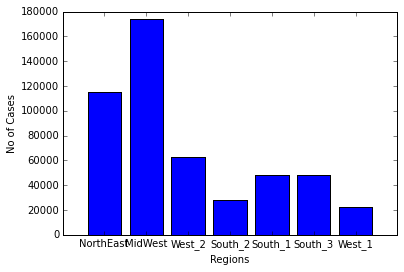

In [416]:
import matplotlib.pyplot as plt
plt.bar(range(len(region)),region.values(),align='center')
plt.xticks(range(len(region)), region.keys())
plt.xlabel('Regions')
plt.ylabel('No of Cases')

In [289]:
#Since we have records till 1969 , we are only interested in 1968
Pop_DF = fin_df[[1968,'state']]

In [293]:
# Now get region population
# define regions
NorthEast =['CT','ME','MA','NH','RI','VT','NJ','NY','PA']
MidWest =['IL','IN','MI','OH','WI','IA','KS','MN','MO','NE','ND','SD']
South_1 =['DE','FL','GA','MD','NC','SC','VA','WV']
South_2 =['AL','KY','MS','TN']
South_3 =['AR','LA','OK','TX']
West_1 =['AZ','CO','ID','MT','NV','NM','UT','WY']
West_2 =['AK','CA','HI','OR','WA'] 

In [304]:
# Now get the populations
region_pop = {'NorthEast':0,'MidWest':0,'South_1':0,'South_2':0,'South_3':0,'West_1':0,'West_2':0}
region_pop['NorthEast'] = Pop_DF[Pop_DF['state'].isin(NorthEast)][1968].sum()
region_pop['MidWest'] = Pop_DF[Pop_DF['state'].isin(MidWest)][1968].sum()
region_pop['South_1'] = Pop_DF[Pop_DF['state'].isin(South_1)][1968].sum()
region_pop['South_2'] = Pop_DF[Pop_DF['state'].isin(South_2)][1968].sum()
region_pop['South_3'] = Pop_DF[Pop_DF['state'].isin(South_3)][1968].sum()
region_pop['West_1'] = Pop_DF[Pop_DF['state'].isin(West_1)][1968].sum()
region_pop['West_2'] = Pop_DF[Pop_DF['state'].isin(West_2)][1968].sum()


In [306]:
affected= {}
for key in region_pop:
    affected[key] = region[key]/(region_pop[key] * 1000)
affected

{'MidWest': 0.0031317963082668964,
 'NorthEast': 0.0023771524135937565,
 'South_1': 0.0016659118979003705,
 'South_2': 0.0022070183702308055,
 'South_3': 0.0025533542253147077,
 'West_1': 0.0027840909090909092,
 'West_2': 0.0024321251995172654}

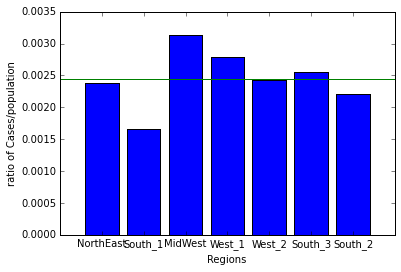

In [414]:
# Now plot affected
import matplotlib.pyplot as plt
plt.bar(range(len(region)),affected.values(),align='center')
plt.xticks(range(len(region)), affected.keys())
plt.xlabel('Regions')
plt.axhline(mean(affected.values()),c='g')
plt.ylabel('ratio of Cases/population')

In [ ]:
# It looks like MidWest was worst hit.


Problem #4
Download Dataset of London 2012 Olympians called AHW_1.CSV. Perform Data preparation and cleaning of the data set.

In [314]:
A_DF = pd.read_csv('AHW_1.csv',sep=',')

In [315]:
A_DF.describe()

,Total,Age,Height,Weight
count,10384.000000,10384.000000,9823.000000,9104.000000
mean,0.052196,26.068856,176.907869,72.852812
std,0.250149,5.440561,11.295433,16.067462
min,0.000000,13.000000,132.000000,36.000000
25%,0.000000,22.000000,169.000000,61.000000
50%,0.000000,25.000000,177.000000,70.000000
75%,0.000000,29.000000,185.000000,81.000000
max,5.000000,71.000000,221.000000,218.000000


In [316]:
print" Number of athletes in each sport"

print A_DF['Sport'].value_counts()

 Number of athletes in each sport
Athletics                                                   2119
Swimming                                                     907
Football                                                     596
Rowing                                                       524
Hockey                                                       416
Judo                                                         368
Shooting                                                     368
Sailing                                                      360
Wrestling                                                    324
Handball                                                     319
Boxing                                                       272
Volleyball                                                   271
Basketball                                                   269
Water Polo                                                   249
Weightlifting                                           

In [150]:
print "Total number of medals",A_DF['Total '].sum()
print "Average Height", A_DF['Height'].mean()
print "Minimum Height", A_DF['Height'].min()
print "Maximum Height", A_DF['Weight'].max()

print "Average Weight", A_DF['Weight'].mean()
print "Minimum Weight", A_DF['Weight'].min()
print "Maximum Weight", A_DF['Weight'].max()

print "Average Age",A_DF['Age'].mean()

print "Total number of male Athletes",len(A_DF[A_DF['Sex']=='M']['Sex'])
print "Total number of female Athetes",len(A_DF[A_DF['Sex']=='F']['Sex'])


Total number of medals 542
Average Height 176.907869286
Minimum Height 132.0
Maximum Height 218.0
Average Weight 72.8528119508
Minimum Weight 36.0
Maximum Weight 218.0
Average Age 26.0688559322
Total number of male Athletes 5756
Total number of female Athetes 4628


In [151]:
# Missing Data
# How much missing data is there? 
A_DF.isnull().sum()

Total        0
Sport        0
Age          0
Height     561
Weight    1280
Sex          0
dtype: int64

In [317]:
# Number of athletes by Sex
print " Number of Athletes by " ,A_DF.groupby('Sex')['Sport'].count()
print " Average Height by ",A_DF.groupby('Sex')['Height'].mean()
print " Average Weight by ",A_DF.groupby('Sex')['Weight'].mean()
print " Maximum Weight by ",A_DF.groupby('Sex')['Weight'].max()
print " Minimum Weight by ",A_DF.groupby('Sex')['Weight'].min()
print " Maximum Weight by ",A_DF.groupby('Sex')['Height'].max()
print " Minimum Weight by ",A_DF.groupby('Sex')['Height'].min()
print " Number of Medals won by",A_DF.groupby('Sex')['Total '].sum()


 Number of Athletes by  Sex
F      4628
M      5756
Name: Sport, dtype: int64
 Average Height by  Sex
F      170.241473
M      182.377131
Name: Height, dtype: float64
 Average Weight by  Sex
F      63.210916
M      80.575865
Name: Weight, dtype: float64
 Maximum Weight by  Sex
F      155
M      218
Name: Weight, dtype: float64
 Minimum Weight by  Sex
F      36
M      42
Name: Weight, dtype: float64
 Maximum Weight by  Sex
F      207
M      221
Name: Height, dtype: float64
 Minimum Weight by  Sex
F      132
M      140
Name: Height, dtype: float64
 Number of Medals won by Sex
F      262
M      280
Name: Total , dtype: int64


In [319]:
M_DF= A_DF[A_DF['Sex']=='M']
F_DF= A_DF[A_DF['Sex']== 'F']

In [320]:
M_DF.describe()

,Total,Age,Height,Weight
count,5756.000000,5756.000000,5396.000000,5055.000000
mean,0.048645,26.562022,182.377131,80.575865
std,0.238872,5.486685,10.101097,15.399897
min,0.000000,15.000000,140.000000,42.000000
25%,0.000000,23.000000,175.000000,70.000000
50%,0.000000,26.000000,182.000000,78.000000
75%,0.000000,29.000000,189.000000,89.000000
max,5.000000,71.000000,221.000000,218.000000


In [321]:
F_DF.describe()

,Total,Age,Height,Weight
count,4628.000000,4628.000000,4427.000000,4049.000000
mean,0.056612,25.455488,170.241473,63.210916
std,0.263461,5.319810,8.823018,10.815807
min,0.000000,13.000000,132.000000,36.000000
25%,0.000000,22.000000,165.000000,56.000000
50%,0.000000,25.000000,170.000000,62.000000
75%,0.000000,29.000000,176.000000,69.000000
max,4.000000,57.000000,207.000000,155.000000


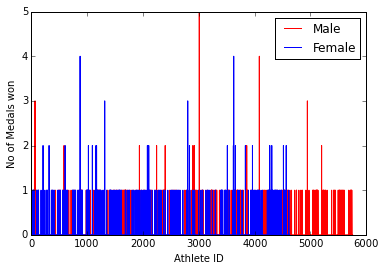

In [322]:
# Plot each attribute distribution
plt.plot(M_DF['Total '],c='r')
plt.plot(F_DF['Total '],c='b')
plt.xlabel('Athlete ID')
plt.ylabel('No of Medals won')
plt.legend(['Male','Female'])

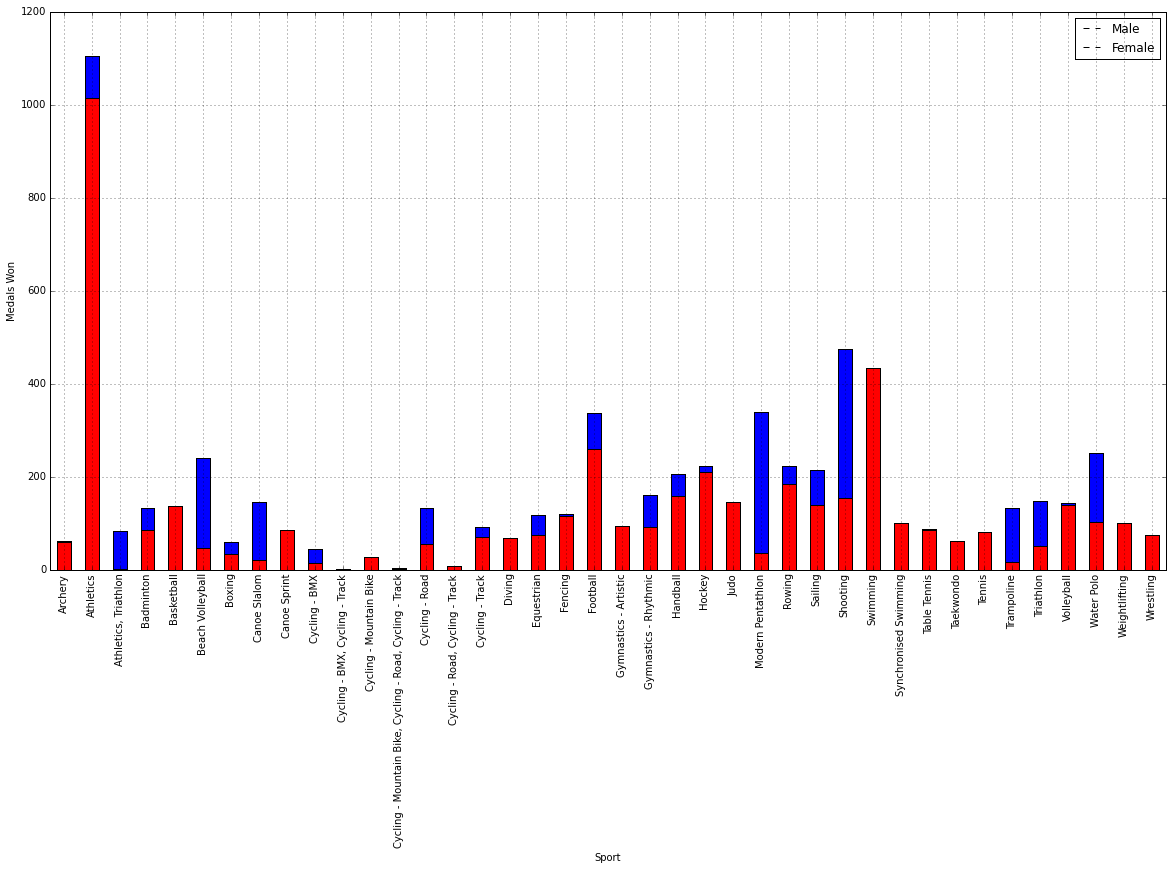

In [463]:
# Plot of medals won in each sport based on sex
SM =M_DF.groupby('Sport')['Total '].count()
SF =F_DF.groupby('Sport')['Total '].count()
SM.plot(kind = 'bar',figsize=(20,10),color ='blue')
SF.plot(kind = 'bar',figsize=(20,10),color ='red')
legend(['Male','Female'])
ylabel('Medals Won')
SM.plot?

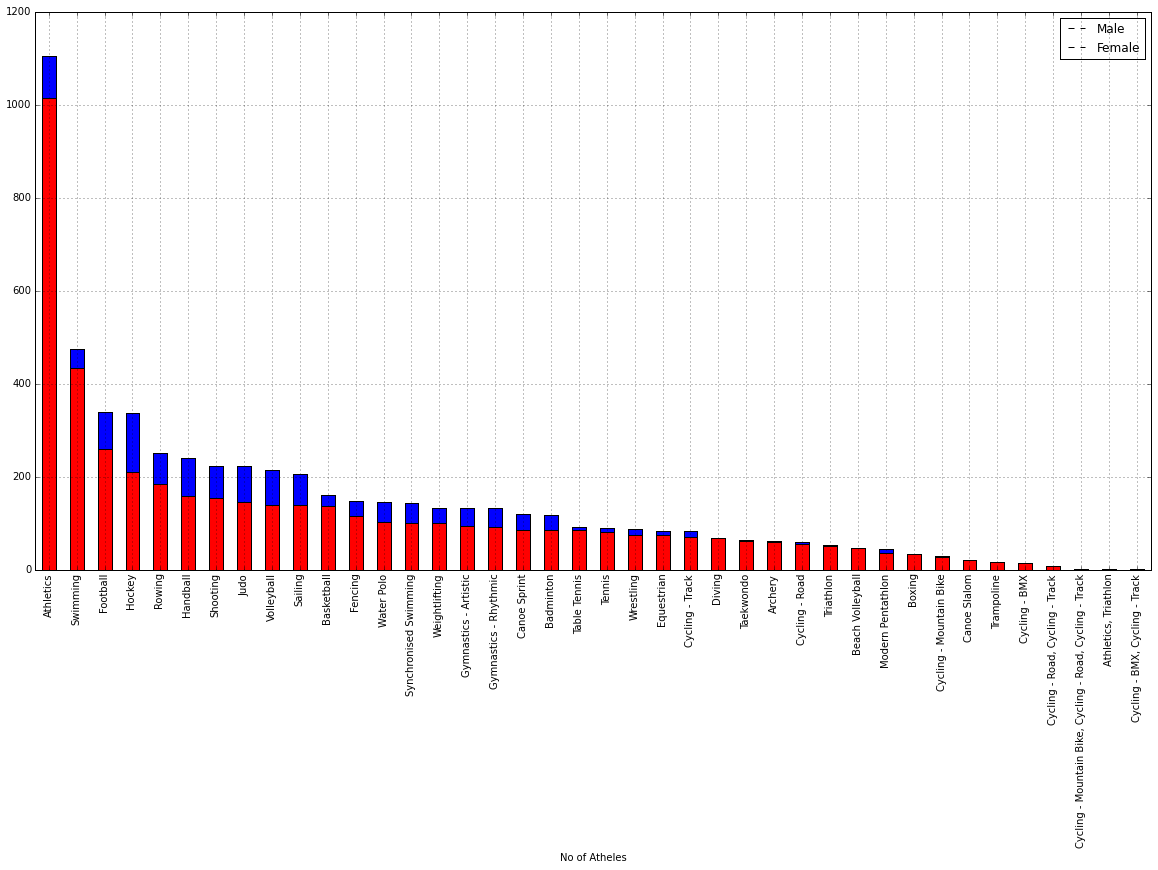

In [464]:
# number of Athletes by each sport
SM =M_DF['Sport'].value_counts()
SF =F_DF['Sport'].value_counts()
SM.plot(kind='bar',figsize=(20,10),color = 'b')
SF.plot(kind = 'bar',figsize=(20,10),color = 'r')
legend(['Male','Female'])
xlabel('No of Atheles')



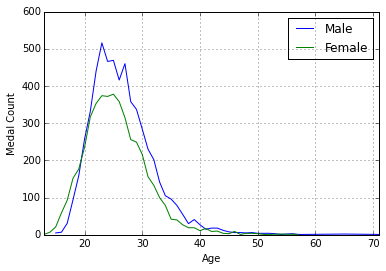

In [325]:
# Medals won by Age
SM =M_DF.groupby('Age')['Total '].count()
SF =F_DF.groupby('Age')['Total '].count()
SM.plot()
SF.plot()
legend(['Male','Female'])
xlabel('Age')
ylabel('Medal Count')

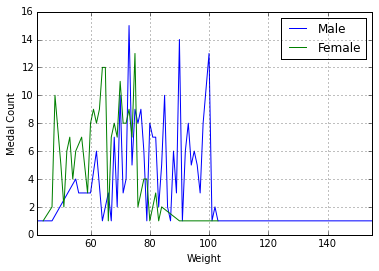

In [326]:
# total medals won by weight
M_DF_T = M_DF[M_DF['Total '] > 0]
F_DF_T = F_DF[F_DF['Total '] > 0]
SM =M_DF_T.groupby('Weight')['Total '].count()
SF =F_DF_T.groupby('Weight')['Total '].count()
SM.plot()
SF.plot()
legend(['Male','Female'])
xlabel('Weight')
ylabel('Medal Count')

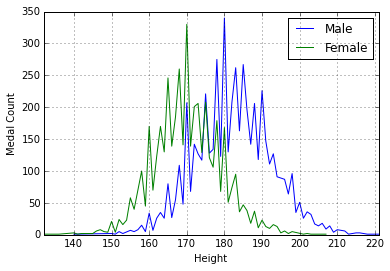

In [327]:
# Medals won by Height
SM =M_DF.groupby('Height')['Total '].count()
SF =F_DF.groupby('Height')['Total '].count()
SM.plot()
SF.plot()
legend(['Male','Female'])
xlabel('Height')
ylabel('Medal Count')

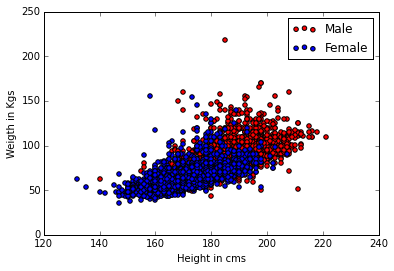

In [328]:
 #Plot of Height V/S Weight for male and female
plt.scatter(M_DF['Height'],M_DF['Weight'],c='red')
plt.scatter(F_DF['Height'],F_DF['Weight'],c='blue')
plt.xlabel('Height in cms')
plt.ylabel('Weigth in Kgs')
plt.legend(['Male','Female'])

The medals won distributions are pretty similar between men and women


In [329]:
# Add column weight in pounds
M_DF['wt_lb'] = M_DF['Weight'] * 2.20462
F_DF['wt_lb'] = F_DF['Weight'] * 2.20462


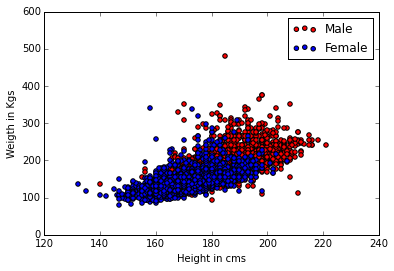

In [330]:
#Plot of Height V/S Weight for male and female
plt.scatter(M_DF['Height'],M_DF['wt_lb'],c='red')
plt.scatter(F_DF['Height'],F_DF['wt_lb'],c='blue')
plt.xlabel('Height in cms')
plt.ylabel('Weigth in Kgs')
plt.legend(['Male','Female'])

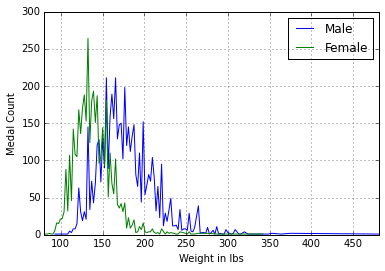

In [331]:
# total medals won by weight
SM =M_DF.groupby('wt_lb')['Total '].count()
SF =F_DF.groupby('wt_lb')['Total '].count()
SM.plot()
SF.plot()
legend(['Male','Female'])
xlabel('Weight in lbs')
ylabel('Medal Count')

M_DF['wt_lb'].hist(bins=50)
F_DF['wt_lb'].hist(bins=50)
xlabel('wt in lbs')
ylabel('no of athletes')

In [332]:
M_DF = M_DF.drop('wt_lb',1)
F_DF = F_DF.drop('wt_lb',1)


In [333]:
M_DF['ht_wt']= M_DF['Height'] + M_DF['Weight']
F_DF['ht_wt']= F_DF['Height'] + F_DF['Weight']

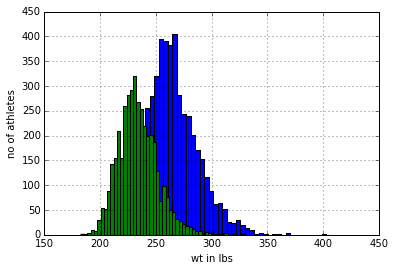

In [334]:
M_DF['ht_wt'].hist(bins=50)
F_DF['ht_wt'].hist(bins=50)
xlabel('wt in lbs')
ylabel('no of athletes')

In [335]:
M_DF['BMI'] = M_DF['Weight']/((M_DF['Height']/100)**2)

In [336]:
F_DF['BMI'] = F_DF['Weight']/((F_DF['Height']/100)**2)

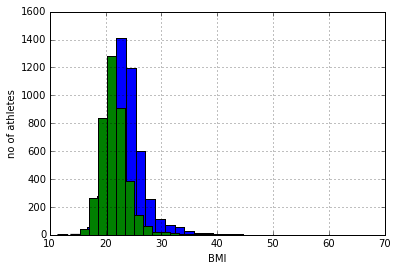

In [337]:
M_DF['BMI'].hist(bins=30)
F_DF['BMI'].hist(bins=30)
xlabel('BMI')
ylabel('no of athletes')

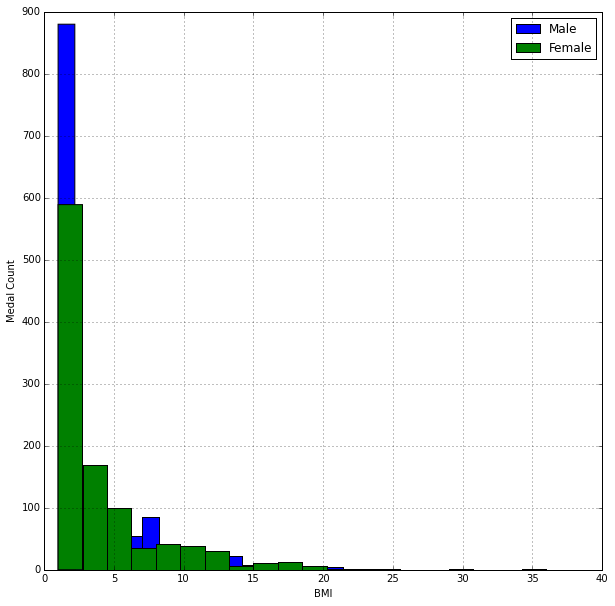

In [338]:
# total medals won by weight
SM =M_DF.groupby('BMI')['Total '].count()
SF =F_DF.groupby('BMI')['Total '].count()
SM.hist(bins=20,figsize=(10,10))
SF.hist(bins=20,figsize=(10,10))
legend(['Male','Female'])
xlabel('BMI')
ylabel('Medal Count')

In [339]:
print M_DF['BMI'].describe()
print F_DF['BMI'].describe()

count    5017.000000
mean       23.961976
std         3.387829
min        11.455268
25%        21.913806
50%        23.510204
75%        25.237205
max        63.696129
dtype: float64
count    4021.000000
mean       21.637999
std         2.820028
min        13.774105
25%        20.047446
50%        21.296296
75%        22.758307
max        62.089409
dtype: float64


In [340]:
M_B = M_DF[M_DF['BMI'] > 30]
F_B = F_DF[F_DF['BMI']>30]


In [465]:
print M_B.describe()
print F_B.describe()

           Total          Age      Height      Weight       ht_wt         BMI
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000
mean     0.040161   28.397590  185.088353  116.787149  301.875502   34.003962
std      0.216258    5.479301    9.919038   18.905508   26.269781    4.447866
min      0.000000   18.000000  140.000000   62.000000  202.000000   30.024445
25%      0.000000   25.000000  180.000000  105.000000  284.000000   31.020408
50%      0.000000   28.000000  186.000000  117.000000  305.000000   32.770513
75%      0.000000   31.000000  192.000000  128.000000  318.000000   34.717839
max      2.000000   47.000000  208.000000  218.000000  403.000000   63.696129
          Total         Age      Height      Weight       ht_wt        BMI
count  67.000000  67.000000   67.000000   67.000000   67.000000  67.000000
mean    0.044776  26.925373  172.746269  103.402985  276.149254  34.588865
std     0.208373   5.748026   10.321122   18.463773   25.791268   5.43728

In [466]:
# No of Medals won by them
print M_B['Total '].sum()
print F_B['Total '].sum()

10
3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114235250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1166d3710>]], dtype=object)

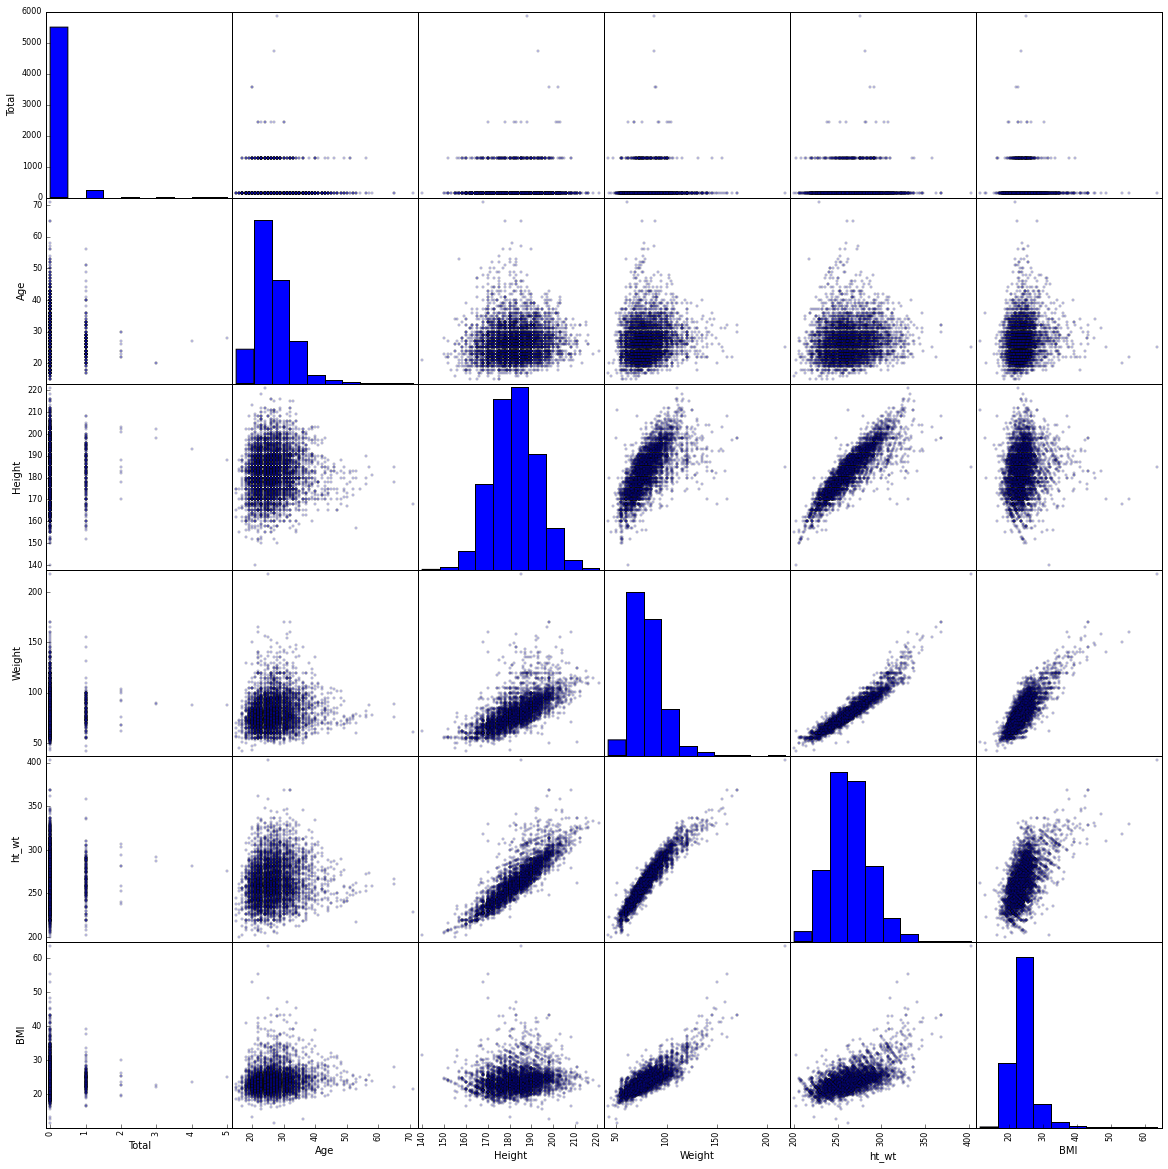

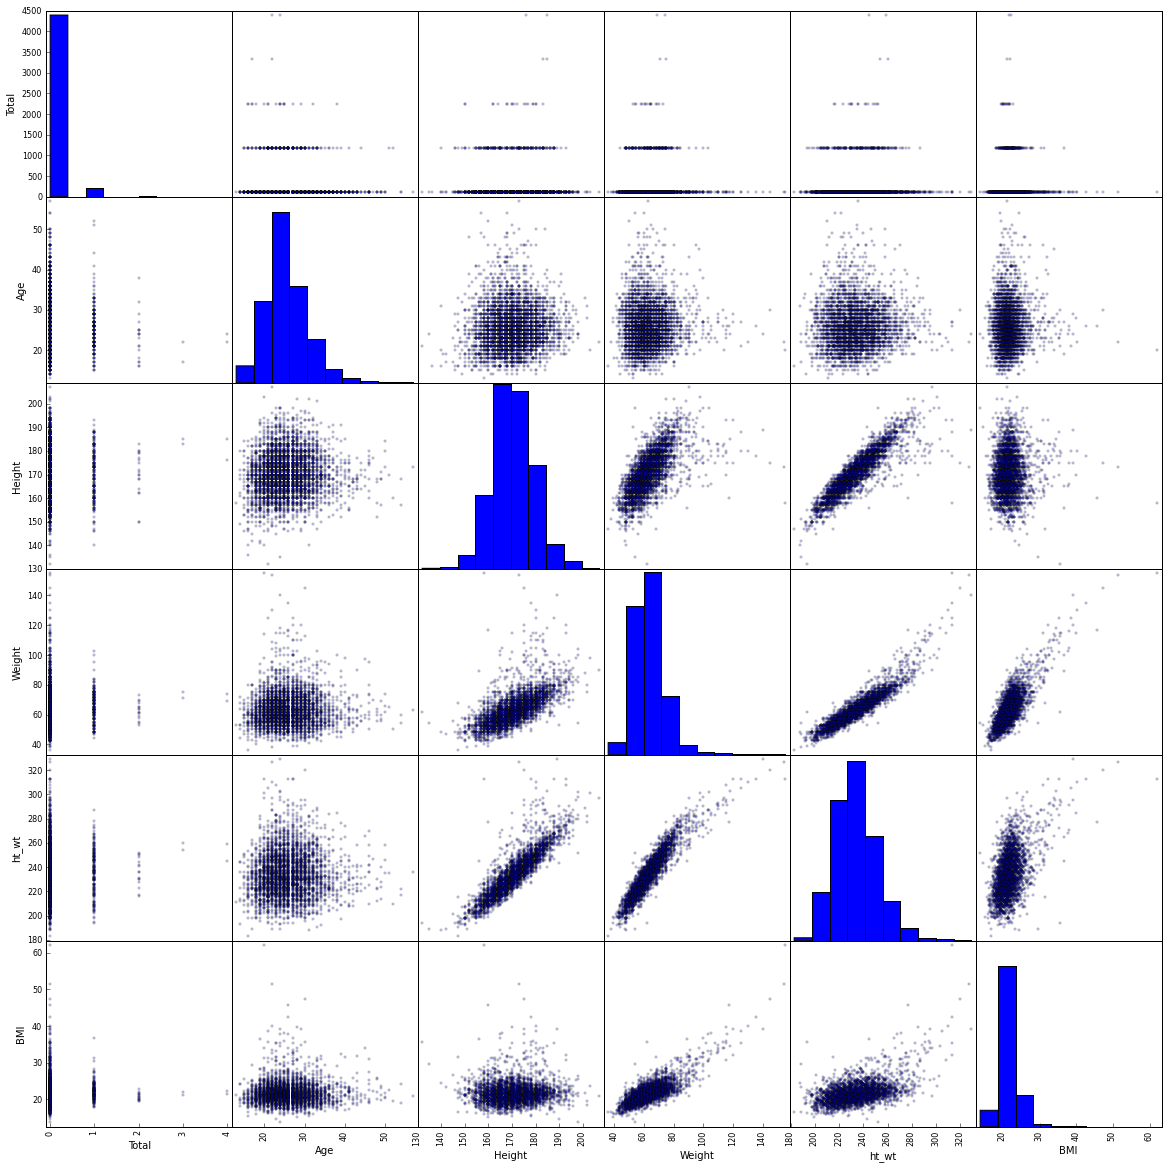

In [341]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(M_DF, alpha=0.2, figsize=(20, 20))
scatter_matrix(F_DF,alpha=0.2, figsize=(20, 20))

In [361]:
Sports = M_DF['Sport'].unique()

In [362]:
Sports

array(['Judo', 'Athletics', 'Boxing', 'Handball', 'Football', 'Hockey',
       'Weightlifting', 'Wrestling', 'Taekwondo', 'Fencing', 'Badminton',
       'Gymnastics - Artistic', 'Cycling - Mountain Bike', 'Basketball',
       'Shooting', 'Swimming', 'Rowing', 'Equestrian', 'Water Polo',
       'Table Tennis', 'Diving', 'Sailing', 'Canoe Slalom',
       'Cycling - Road', 'Canoe Sprint', 'Volleyball', 'Tennis', 'Archery',
       'Cycling - Track', 'Beach Volleyball', 'Triathlon', 'Cycling - BMX',
       'Modern Pentathlon', 'Cycling - Mountain Bike, Cycling - Track',
       'Cycling - Road, Cycling - Track', 'Trampoline',
       'Cycling - Mountain Bike, Cycling - Road',
       'Cycling - Mountain Bike, Cycling - Road, Cycling - Track'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1207877d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122ccbb50>]], dtype=object)

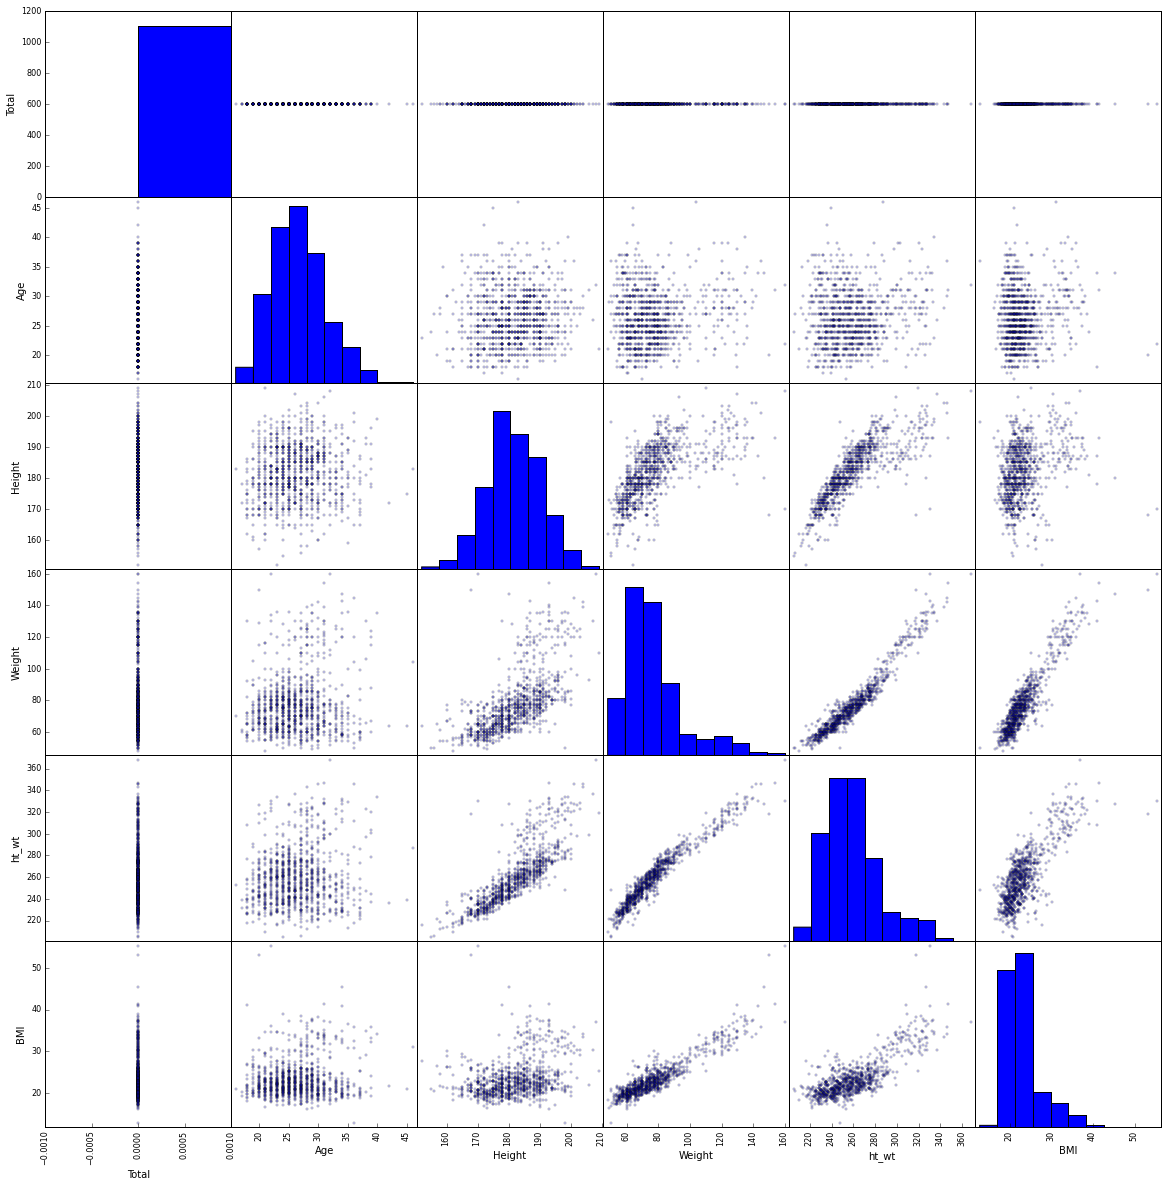

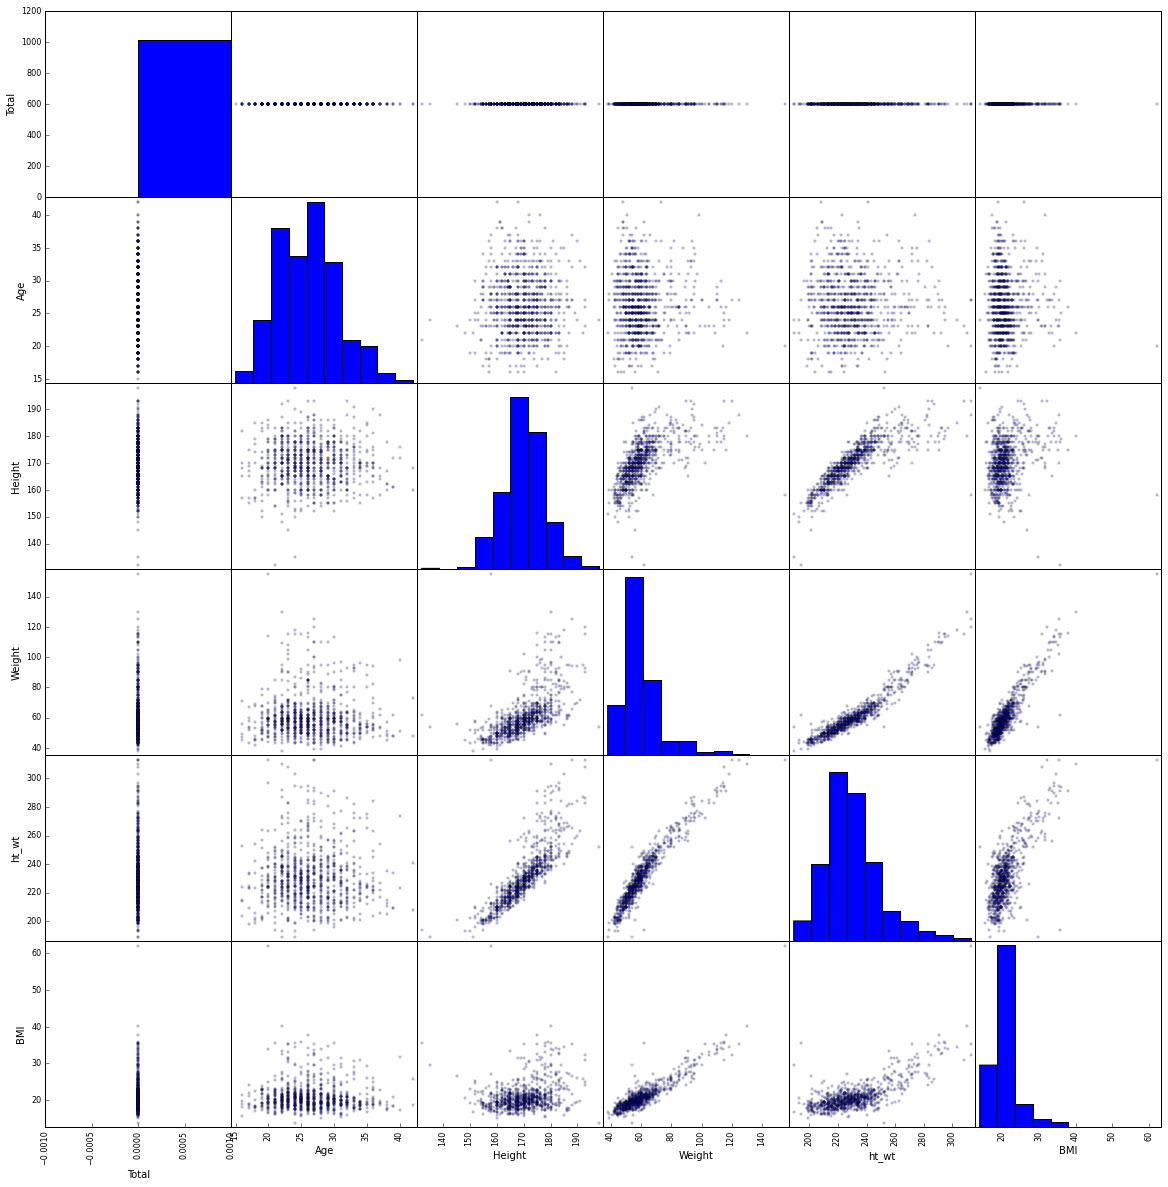

In [371]:
scatter_matrix(M_DF[M_DF['Sport'] == 'Athletics'],alpha=0.2, figsize=(20, 20))
scatter_matrix(F_DF[F_DF['Sport'] == 'Athletics'],alpha=0.2, figsize=(20, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dd73190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f859d90>]], dtype=object)

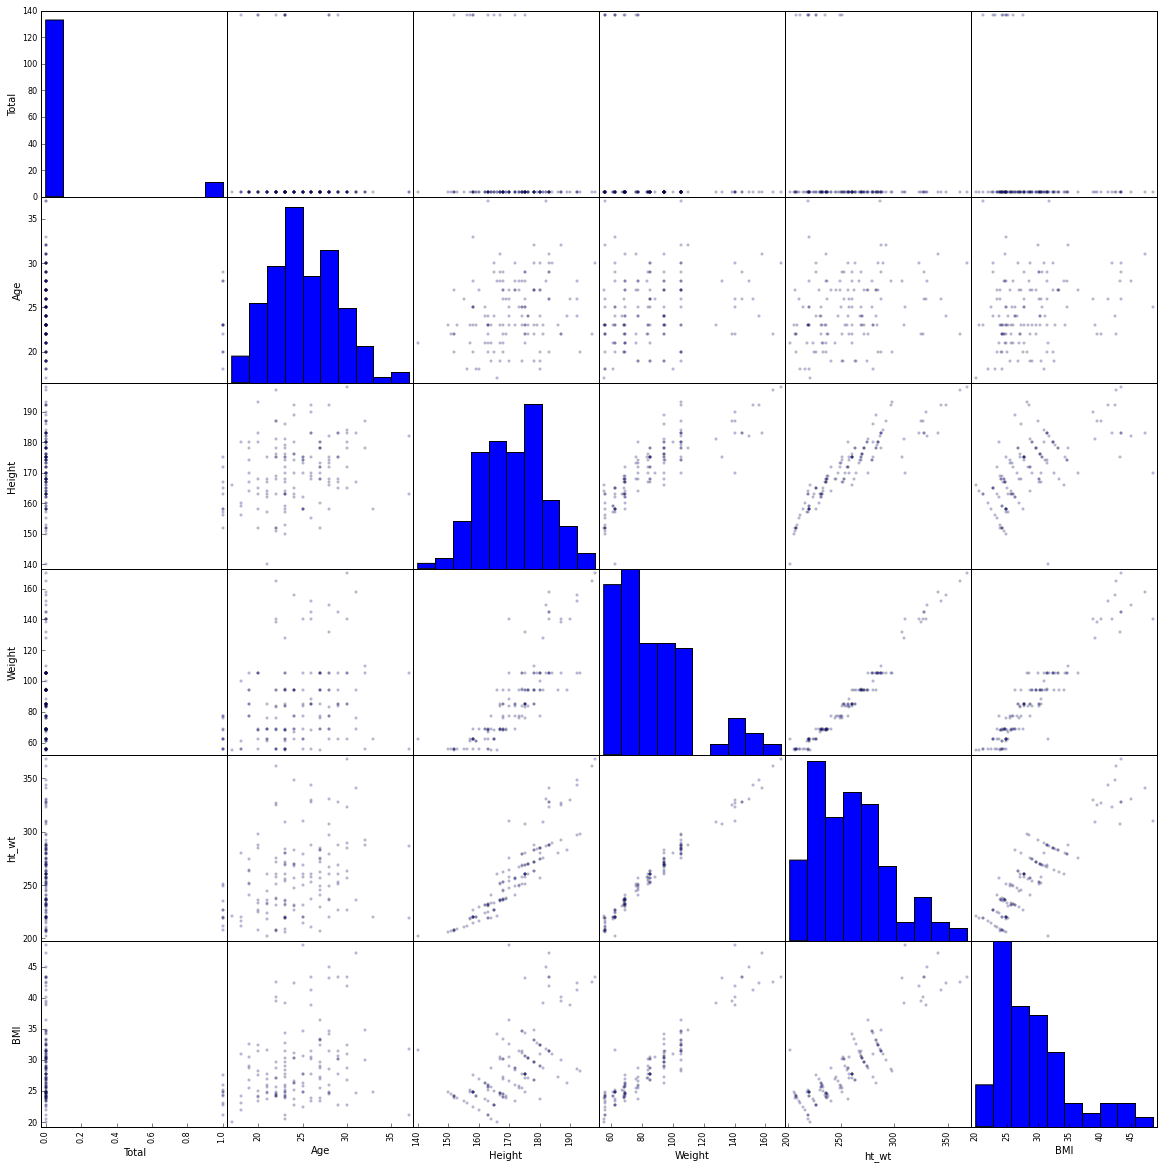

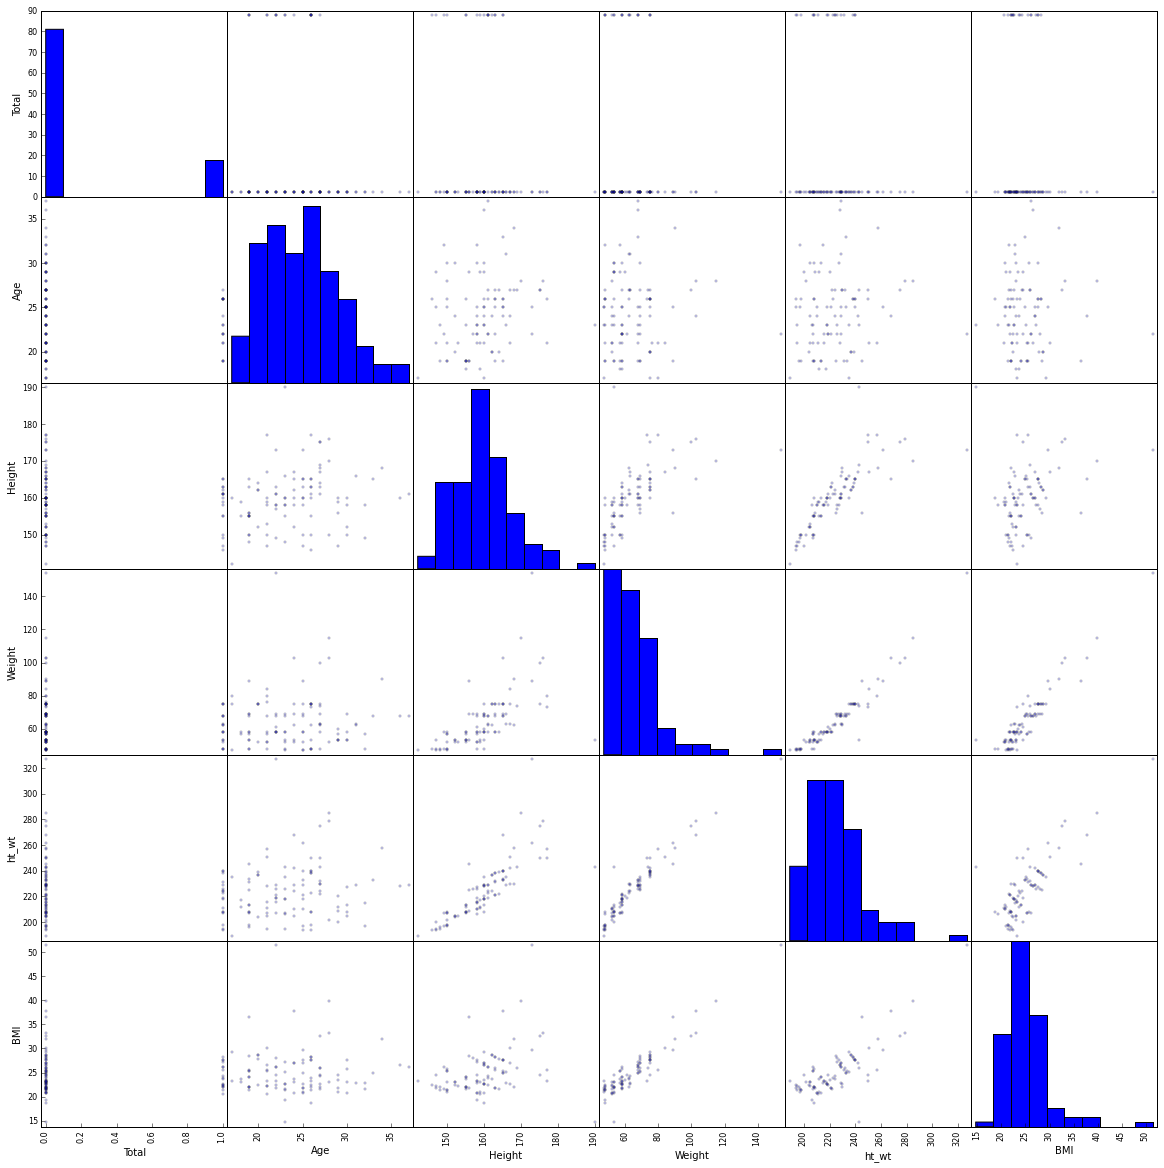

In [372]:
scatter_matrix(M_DF[M_DF['Sport'] == 'Weightlifting'],alpha=0.2, figsize=(20, 20))
scatter_matrix(F_DF[F_DF['Sport'] == 'Weightlifting'],alpha=0.2, figsize=(20, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133eac690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12f6d4250>]], dtype=object)

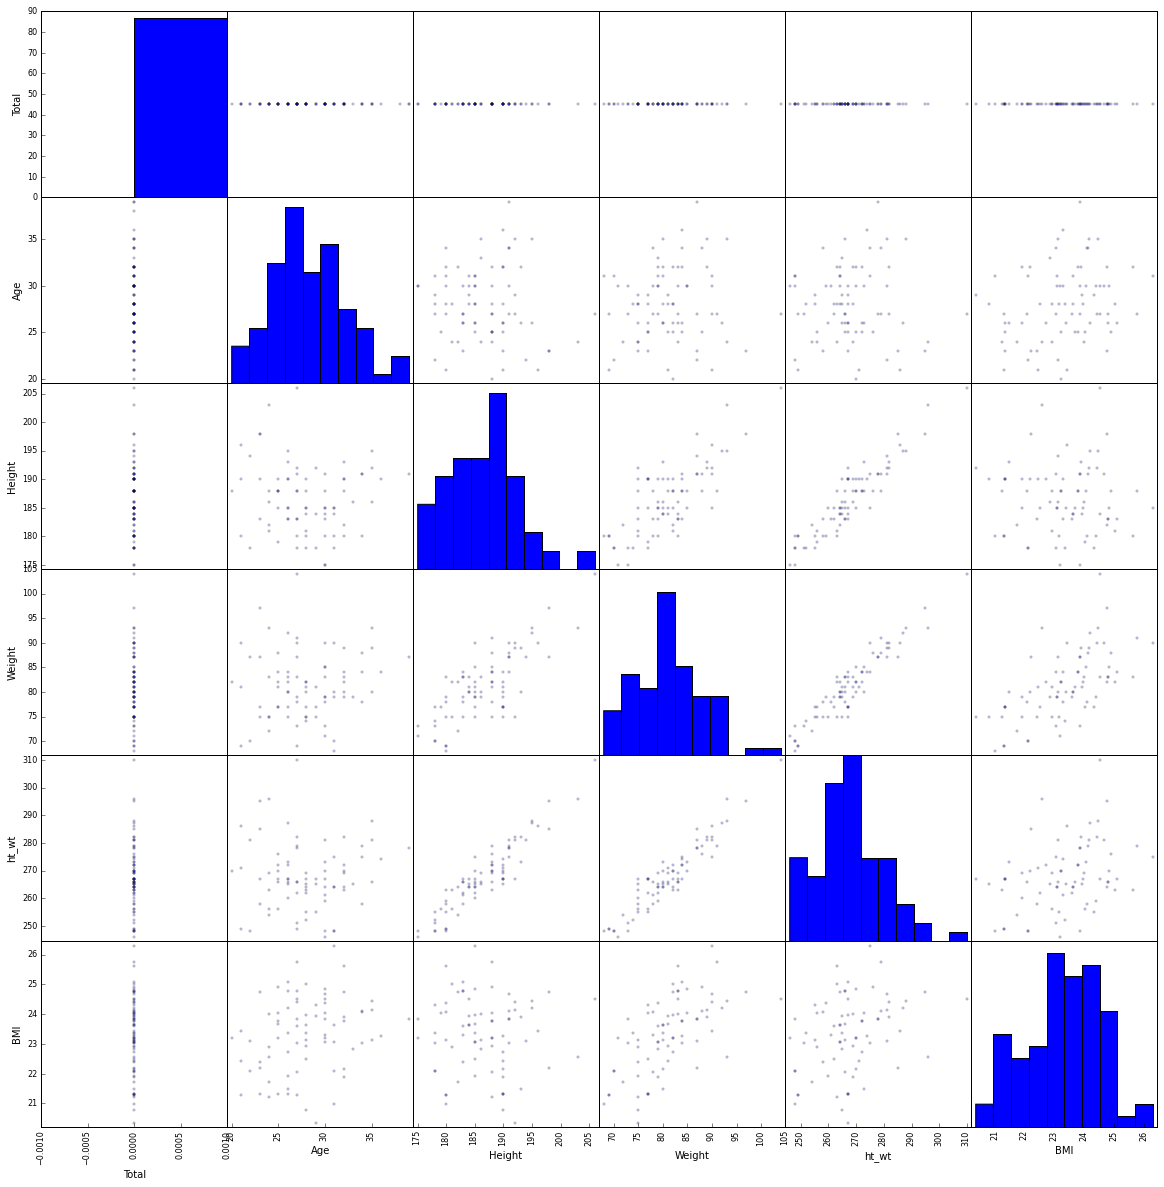

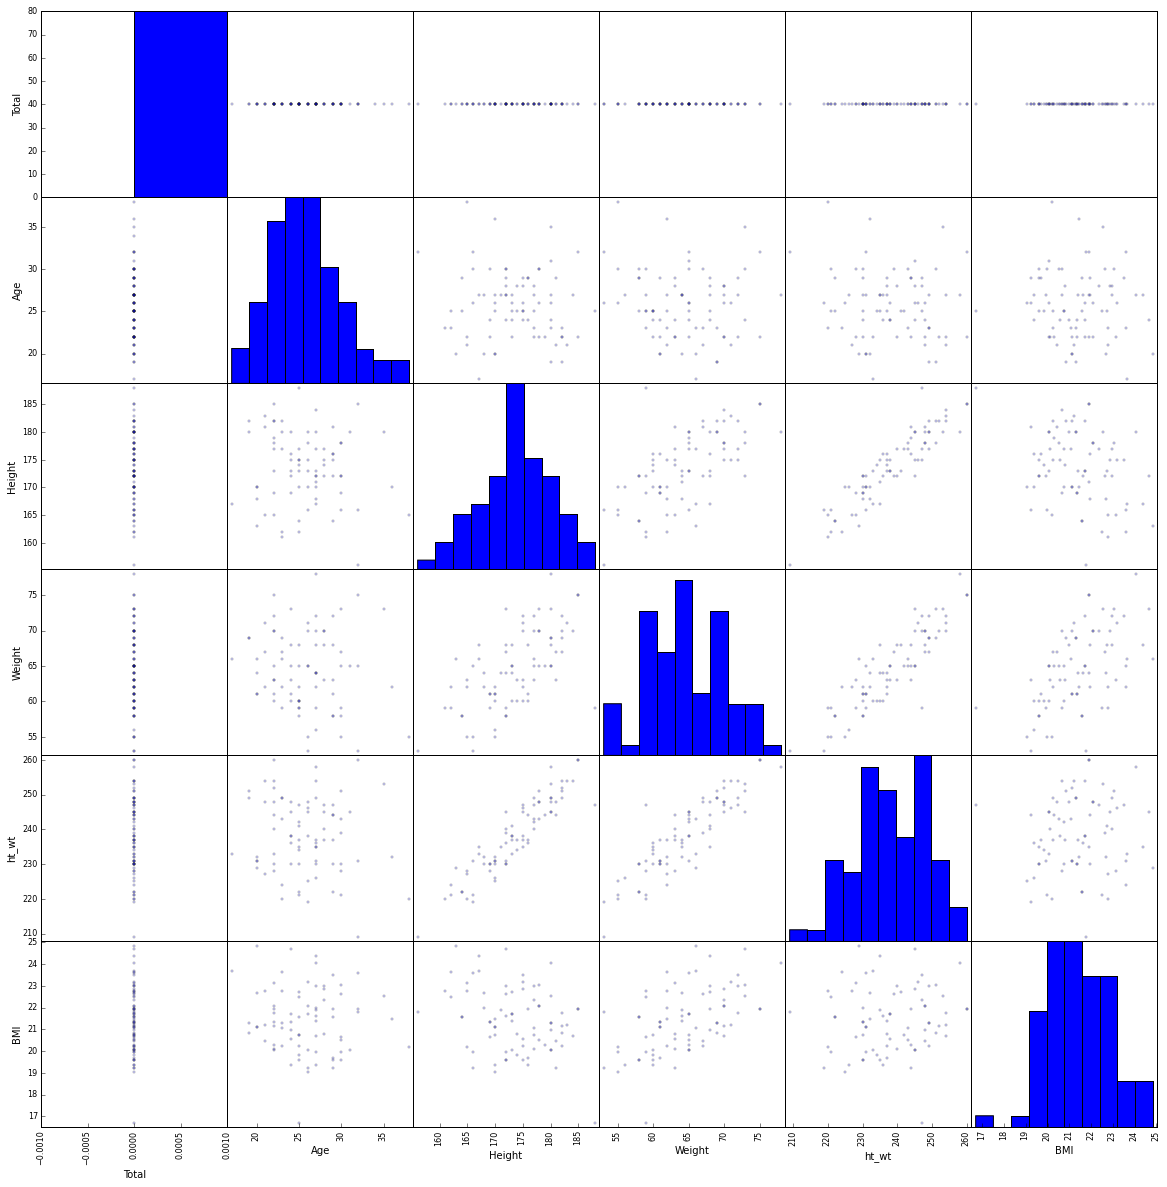

In [376]:
scatter_matrix(M_DF[M_DF['Sport'] == 'Tennis'],alpha=0.2, figsize=(20, 20))
scatter_matrix(F_DF[F_DF['Sport'] == 'Tennis'],alpha=0.2, figsize=(20, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129f87610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12bc7d450>]], dtype=object)

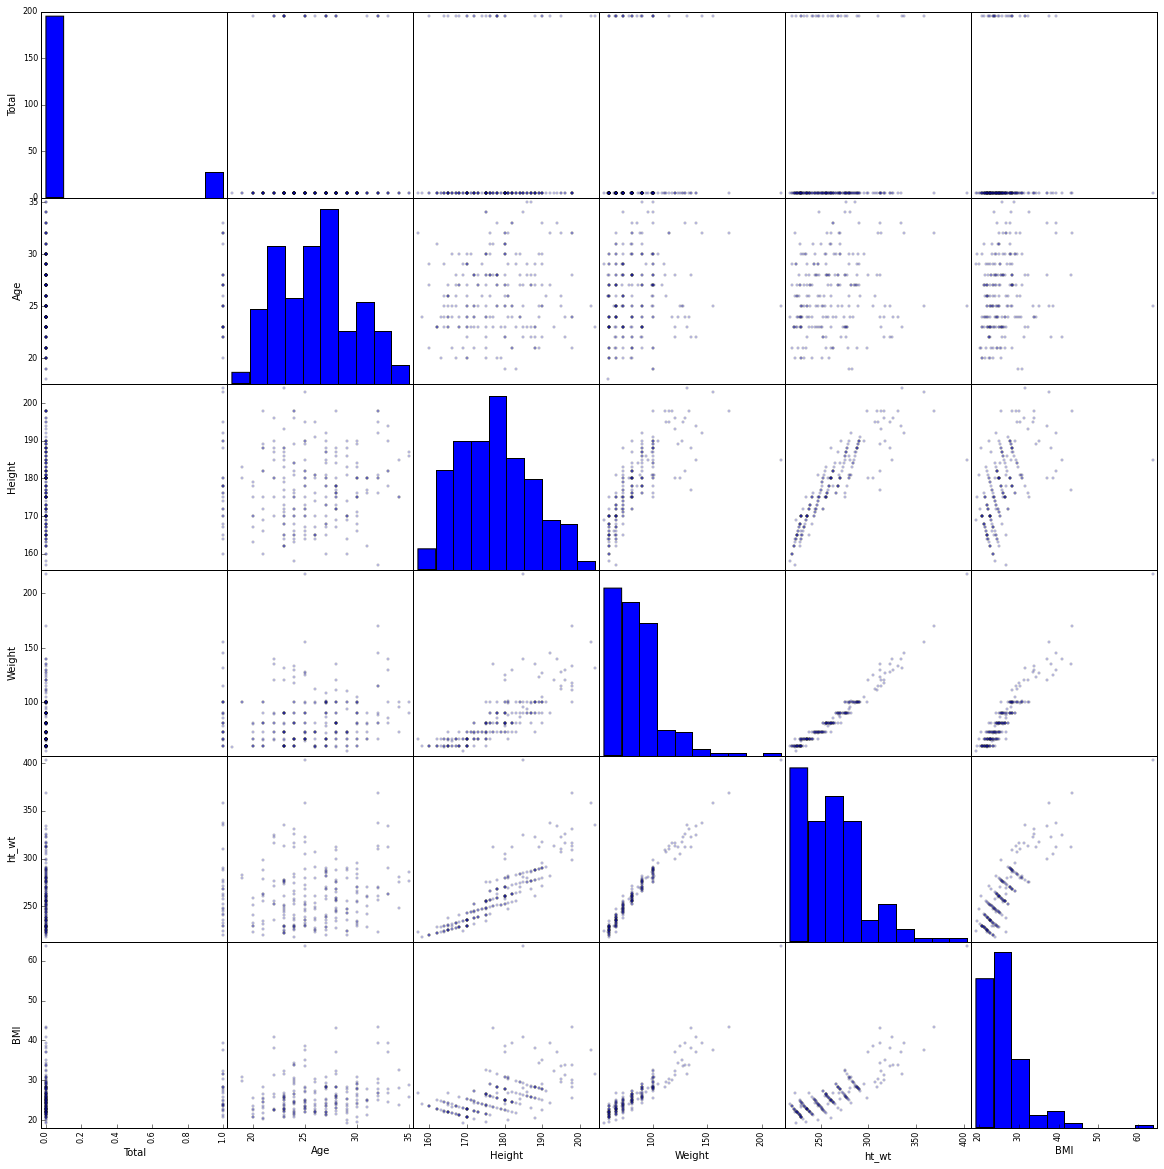

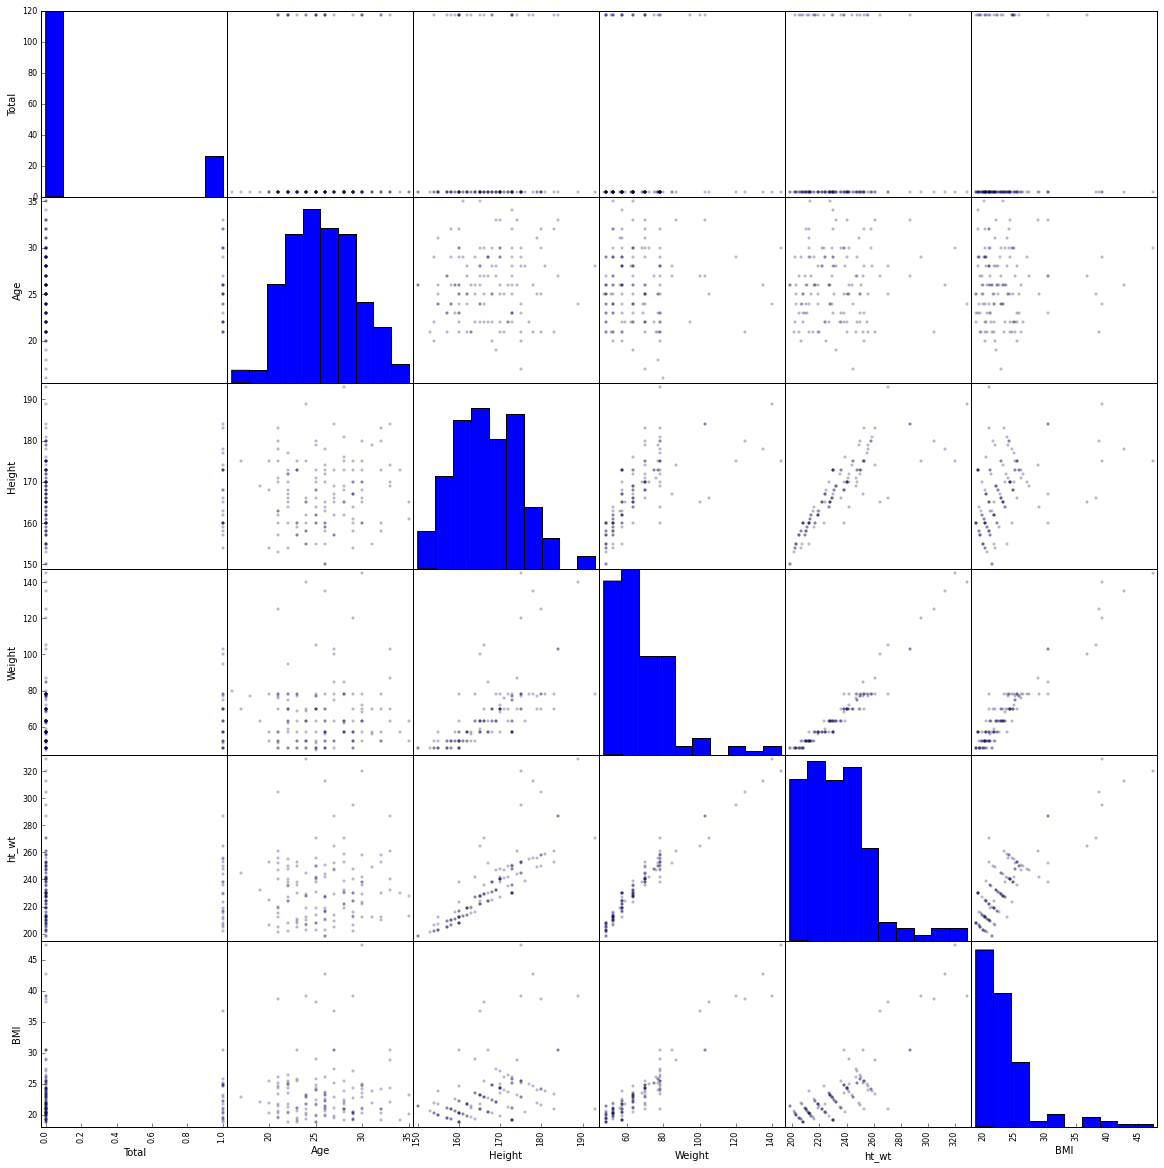

In [374]:
scatter_matrix(M_DF[M_DF['Sport'] == 'Judo'],alpha=0.2, figsize=(20, 20))
scatter_matrix(F_DF[F_DF['Sport'] == 'Judo'],alpha=0.2, figsize=(20, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13098c150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1294baa10>]], dtype=object)

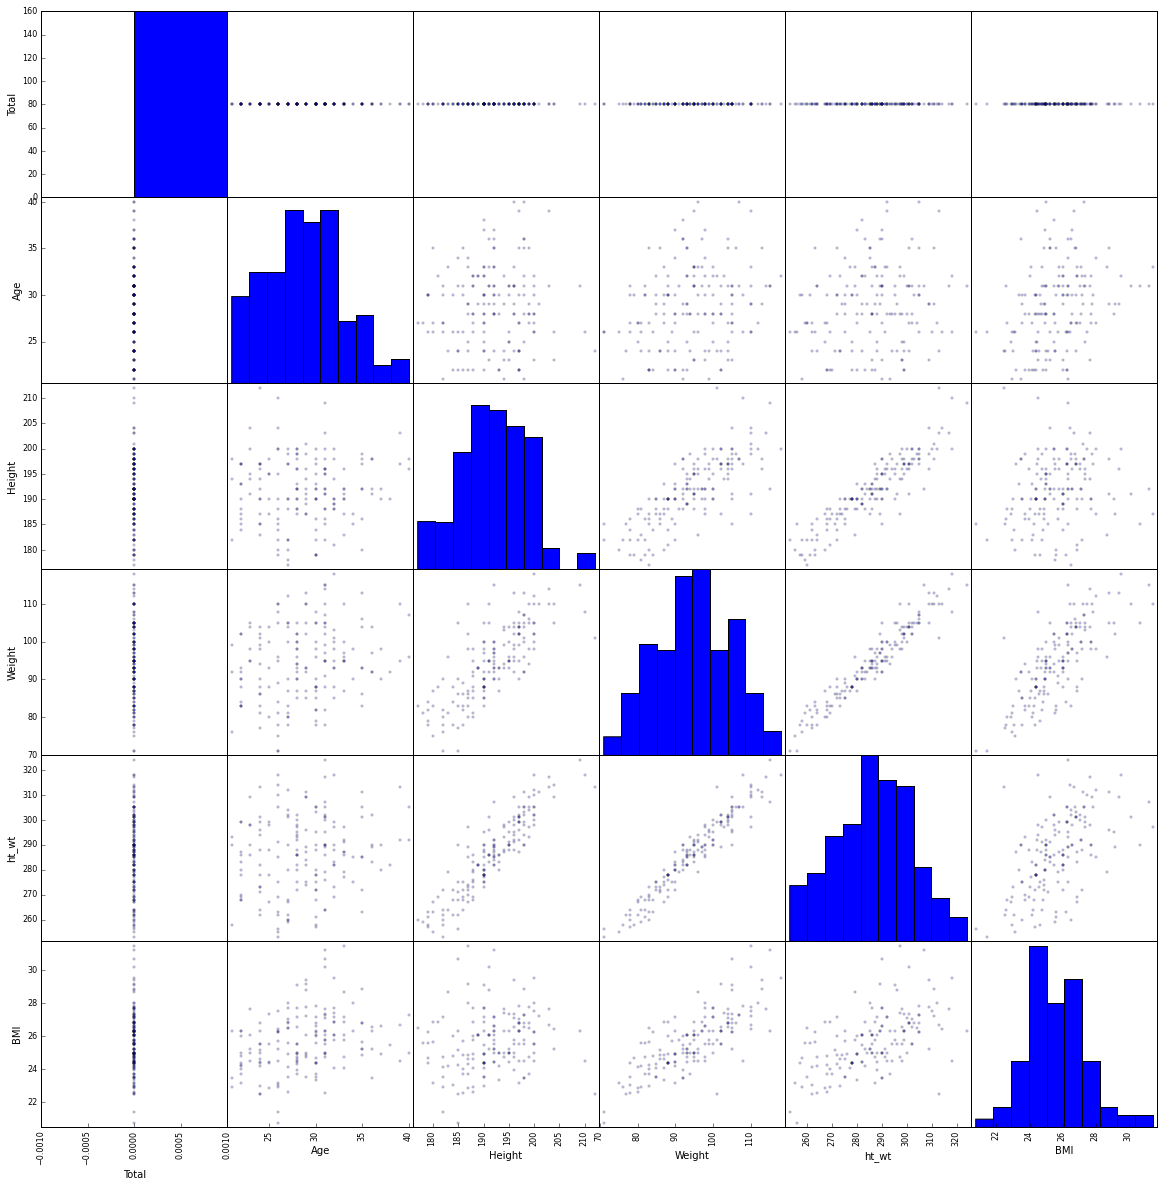

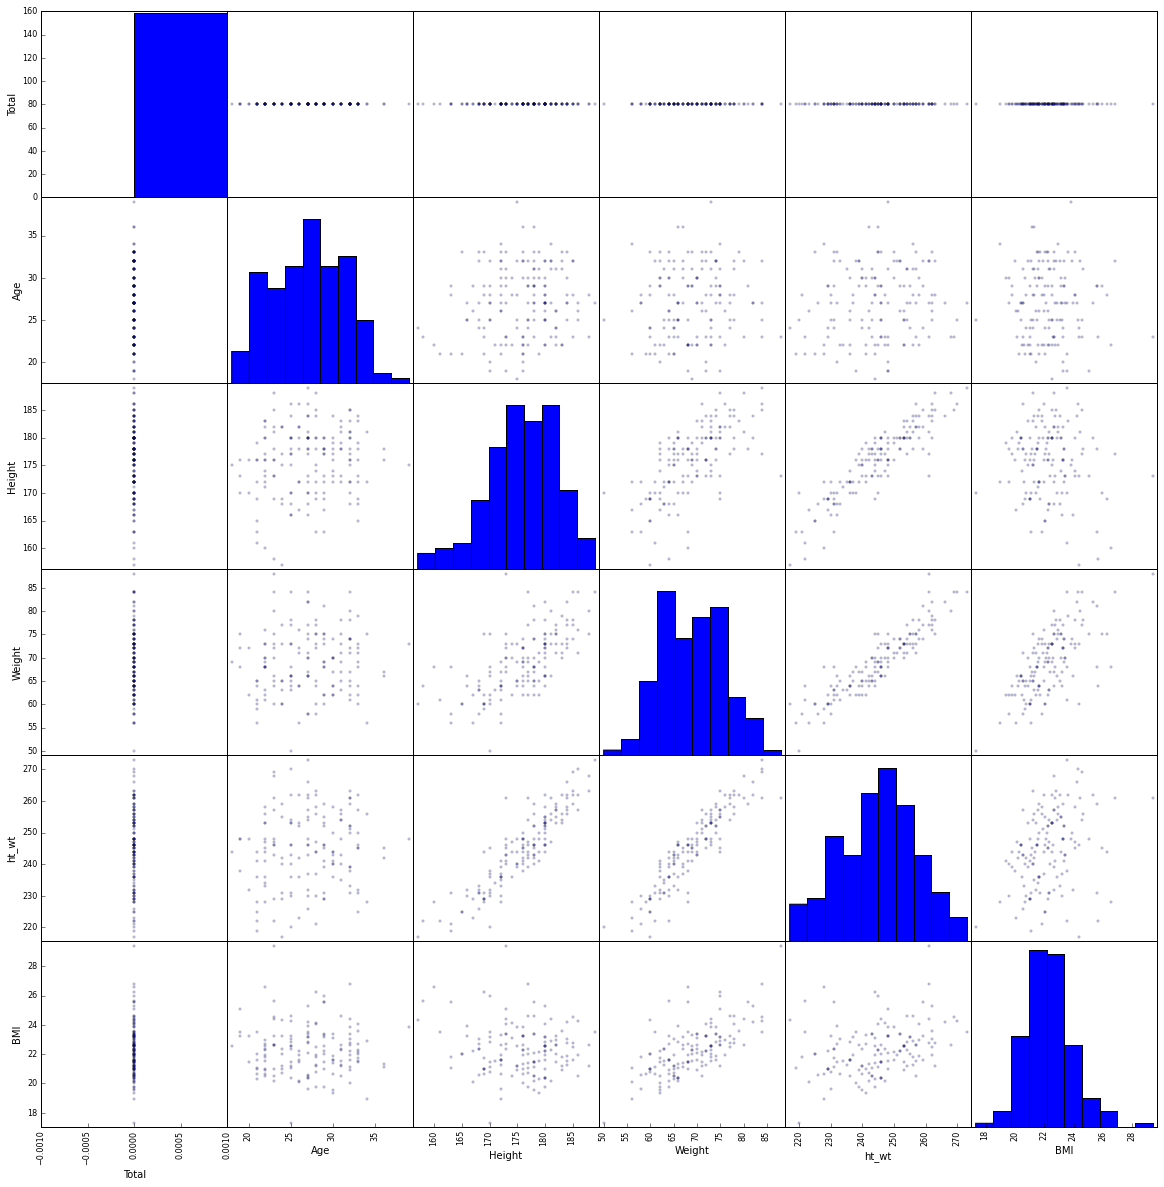

In [375]:
scatter_matrix(M_DF[M_DF['Sport'] == 'Handball'],alpha=0.2, figsize=(20, 20))
scatter_matrix(F_DF[F_DF['Sport'] == 'Handball'],alpha=0.2, figsize=(20, 20))

What are the statistical distributions of variables using no class? How much missing data is there? How do distributions differ by each sex? Describe summary statistics for each attribute. Plot each one of the attributes distributions. Are any of the variables different for male vs. female athletes? Visualize potential difference via the scatter plots. Are there any ‘high’ correlations between variables? Create a new variable for the weight in lbs. Check out the correlations again. Do you notice any changes? Remove one of the weight variables. Add new variable weight + height. Visualize scatter plot. Is this a useful variable?2 Repeat the same exercise for Body Mass Index defined as Mass (kg)/Height(m) (Note: Weight already in Kg. and Height is in cm). Is this a useful variable? Plot the BMI of the athletes. Are there any obese athletes? Male of Female? Visualize scatterplots of Total Class with Height, Weight, Sex and BMI. Split data by sport. What can you conclude based on the split?

1.There is some correlation between Height and Weight but other attributes do not seem to have much of a correlation.
2.Converting into Lbs did not make a difference
3.ht_wt does not seem to be useful since it does not help me in concluding anything. 
4.Yes there are some obese athletes. There are 249 Male Obese Athletes and 67 Female Obese Athletes.
  10 medals were won by these Male obese Athletes and 3 medals were won by Female obese athletes.
5.On splitting the data by sports , I observed that the obese atheletes were in Weightlifting and Wrestling but not in Atlethics.


5. Problem #5 - Decision Trees
Classification trees, either binary or multi-class, are implemented in scikit-learn in the DecisionTreeClassifier class. Build, plot and evaluate a decision tree on the wine dataset. Split the dat set into 75% for training and 25% for testing. Evaluate based on confusion matrix how well the model performed on training vs. testing. Document the steps taken.

In [419]:
Attr = ['Class','Alcohol','Malic acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoid','Proanthocyanins',
        'Color','Hue','OD','Proline']

Wine_df = pd.read_csv('/Users/preetijavaji/Downloads/wine.data.txt',sep=',',names = Attr,index_col=None)

In [420]:
Test = Wine_df['Class']

Wine_df = Wine_df.drop('Class',axis=1)

In [421]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y = train_test_split(Wine_df, Test, test_size=0.33, random_state=42)
print train_x.shape,train_y.shape,test_x.shape,test_y.shape

(119, 13) (119,) (59, 13) (59,)


In [431]:
from sklearn.cross_validation import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_x,train_y)
y= clf.predict(test_x)

In [432]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y)

0.96610169491525422

In [433]:
from sklearn.externals.six import StringIO  
import pydot
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("wine.pdf") 

ImportError: No module named pydot

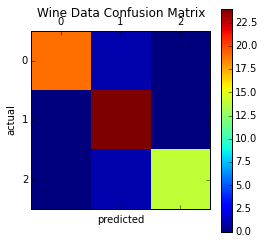

In [437]:
from sklearn.metrics import confusion_matrix

ErrMat = confusion_matrix(test_y,y)
plt.matshow(ErrMat)
plt.title("Wine Data Confusion Matrix")

plt.xlabel('predicted')
plt.ylabel('actual')
plt.colorbar()
plt.show()


Based on the confusion matrix we can see that there were a few Class 0 that were predicted as 1 and a few Class 2 that were predicted as 1